#Step 1: Import Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the iris dataset
iris = pd.read_csv("https://www.alvinang.sg/s/iris_dataset.csv")

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder to the species column
le.fit(iris["species"])

# Transform the species column
iris["species"] = le.transform(iris["species"])

iris

#In the iris dataset,
#Rows 0 to 49 = Setosa = Class 0
#Rows 50 to 99 = Versicolor = Class 1
#Rows 100 to 149 = Vriginica = Class 2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


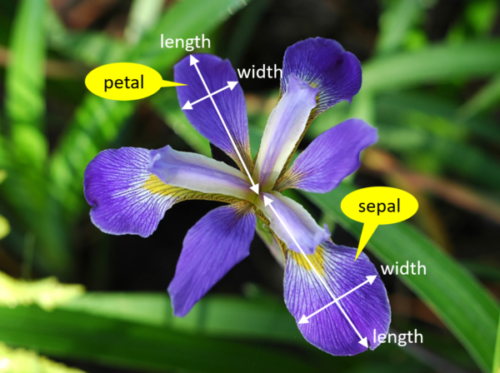



---



#Step 2: Train Test Split

In [2]:
from sklearn.model_selection import train_test_split

# Target
y = iris["species"]

# Features
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

#Split the data into a training set and a testing set.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)



---



#Step 3: Build and Train the Decision Tree

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object.
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy")

# Fit the model to the training data.
rfc.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy')



---



#Step 4: Predicting

In [4]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    "predicted_class": rfc.predict(test_X),
    "actual_class": test_y.tolist()
})


# Print the DataFrame
display(df)

,predicted_class,actual_class
0,0,0
1,2,2
2,2,2
3,1,1
4,0,0
5,0,0
6,1,1
7,2,2
8,2,2
9,0,0




---



#Step 5: Accuracy Score

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y.tolist(), rfc.predict(test_X))

#very high accuracy!

0.9



---



#Step 6: Visualizing the Tree

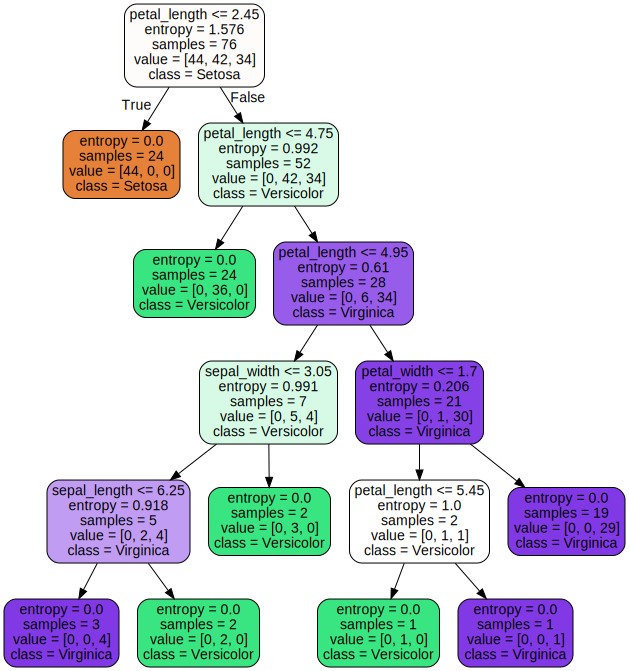

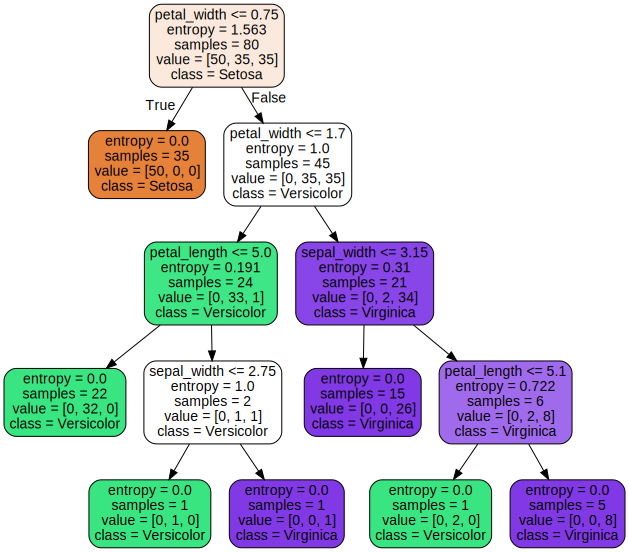

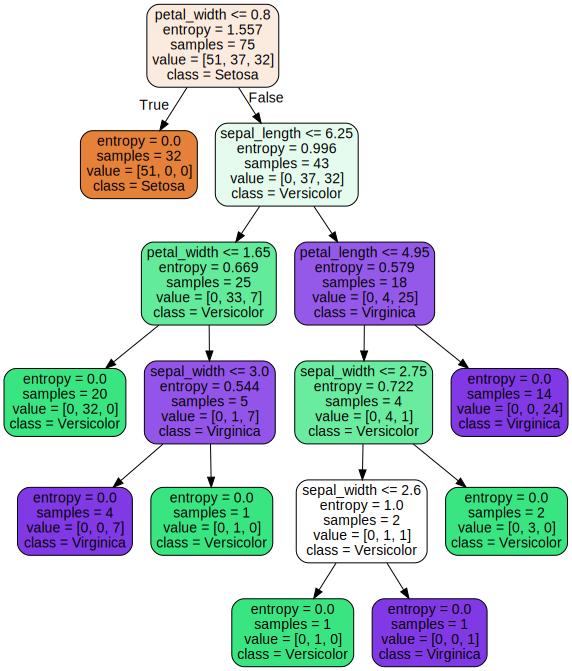

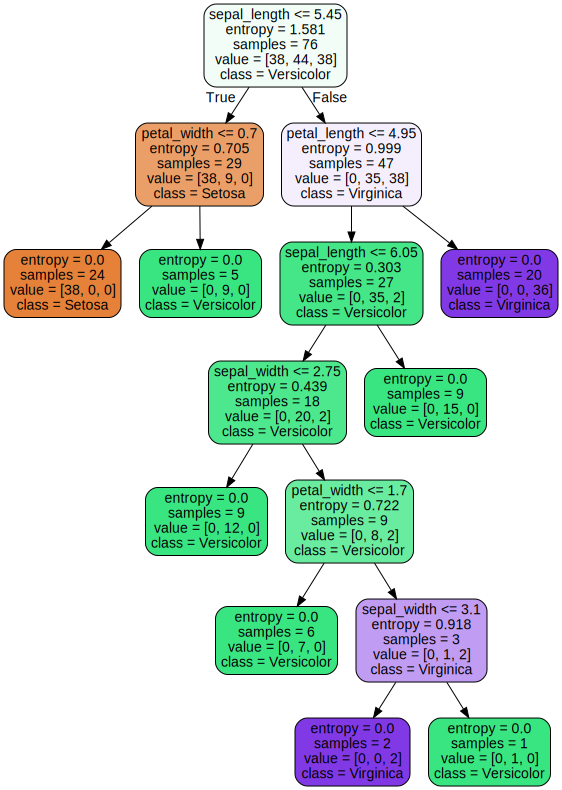

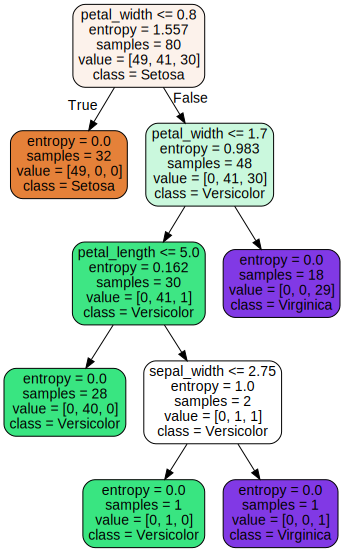

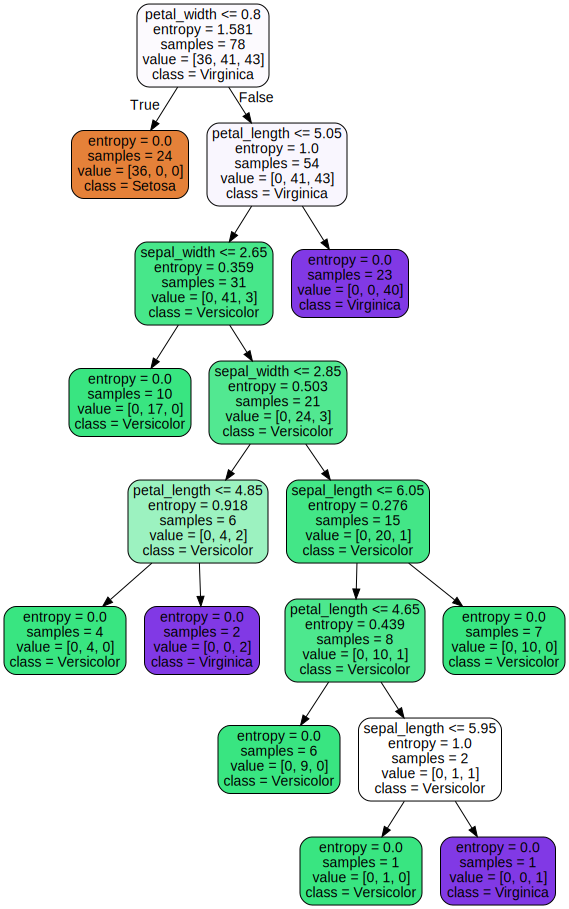

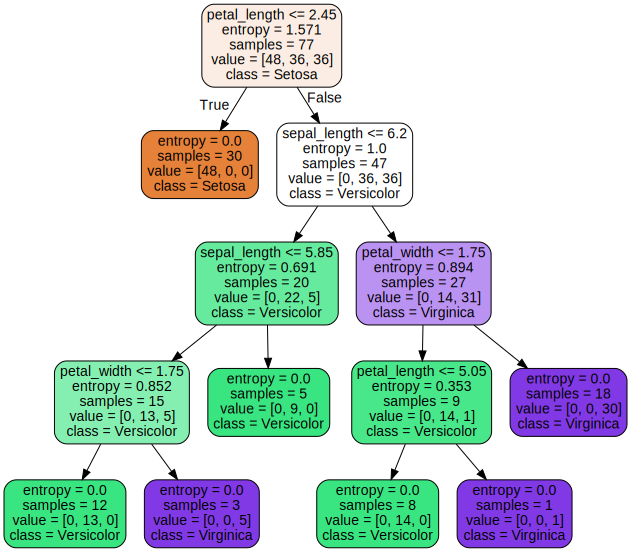

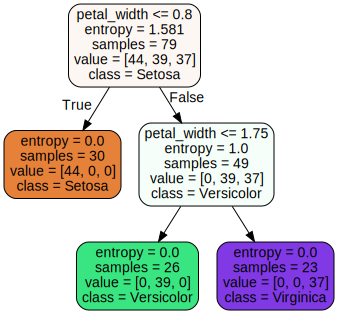

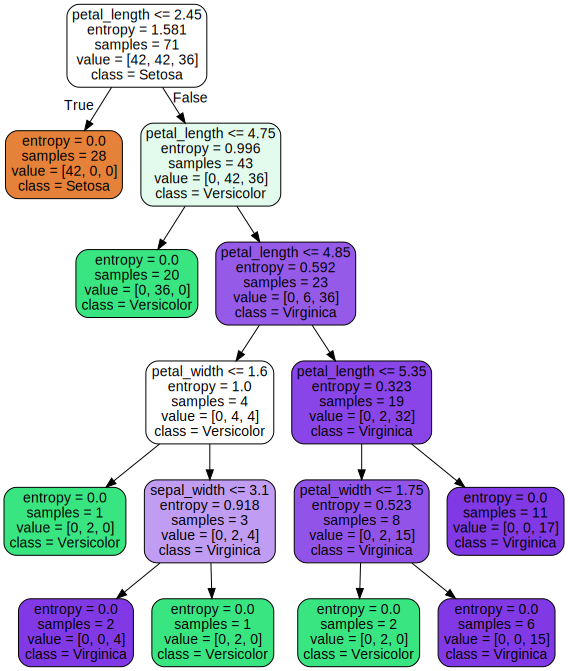

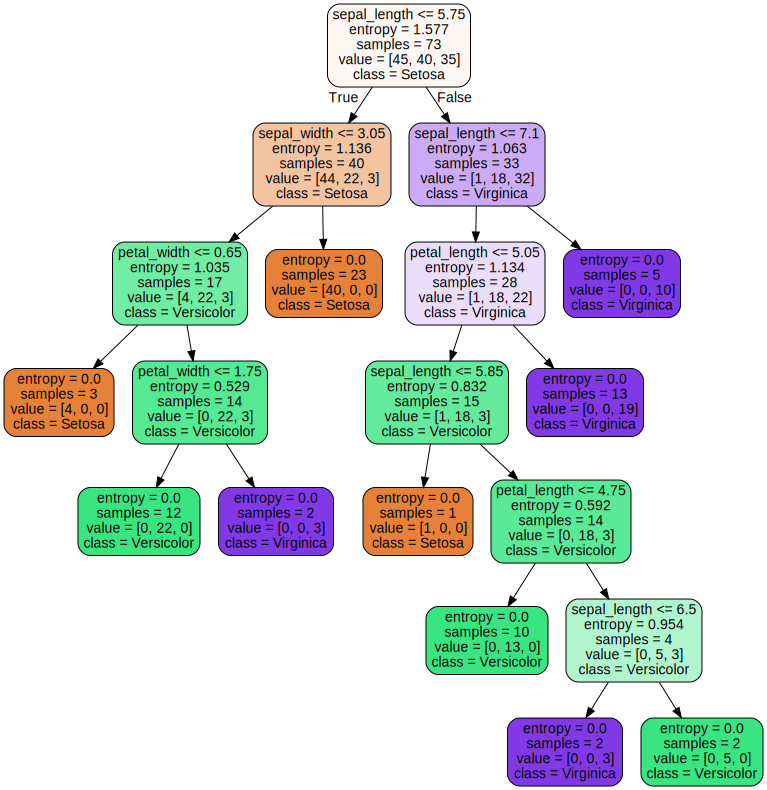

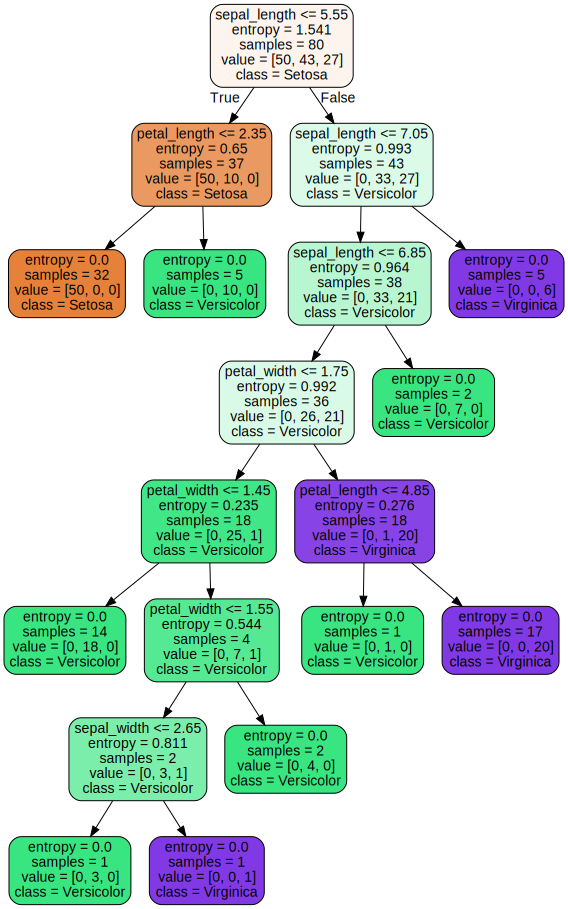

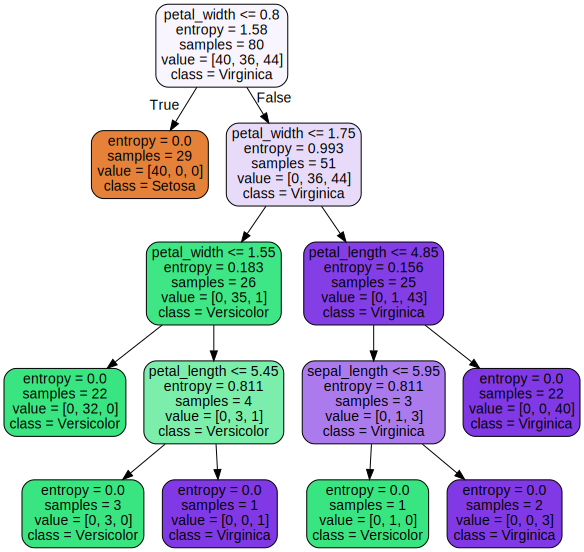

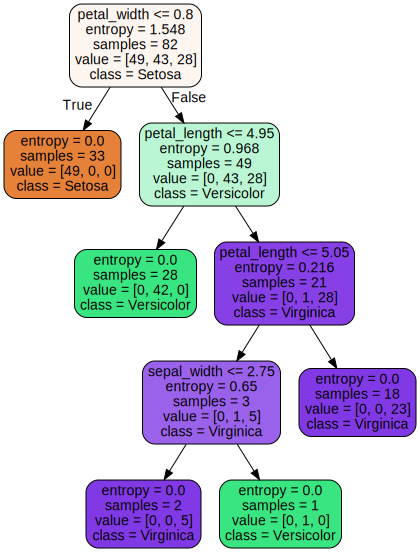

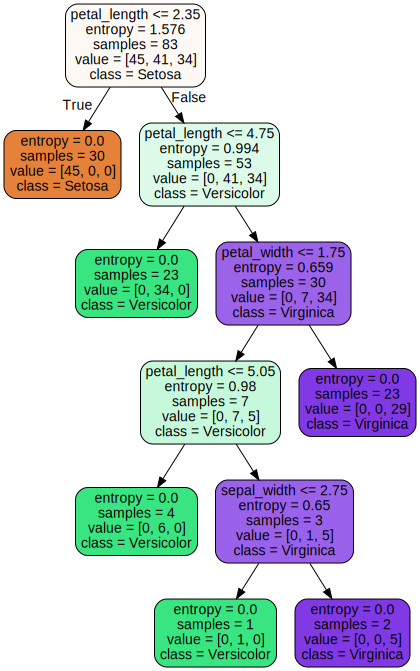

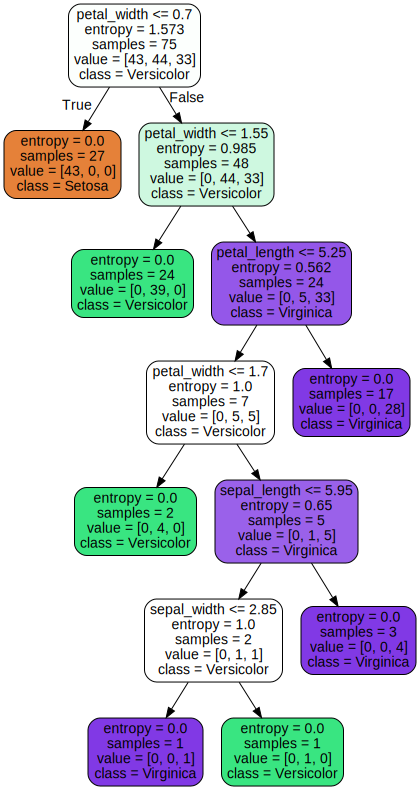

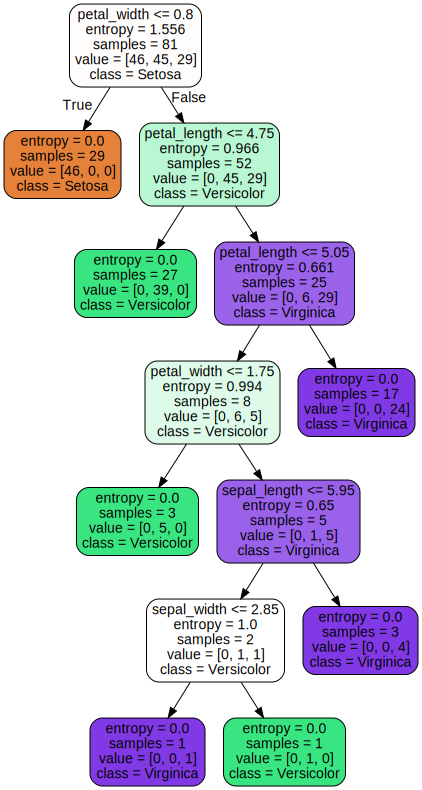

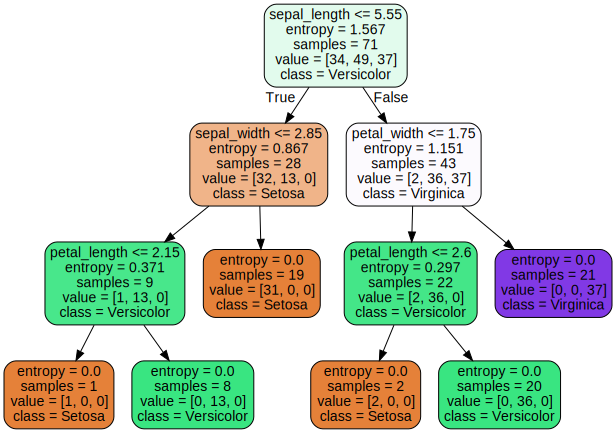

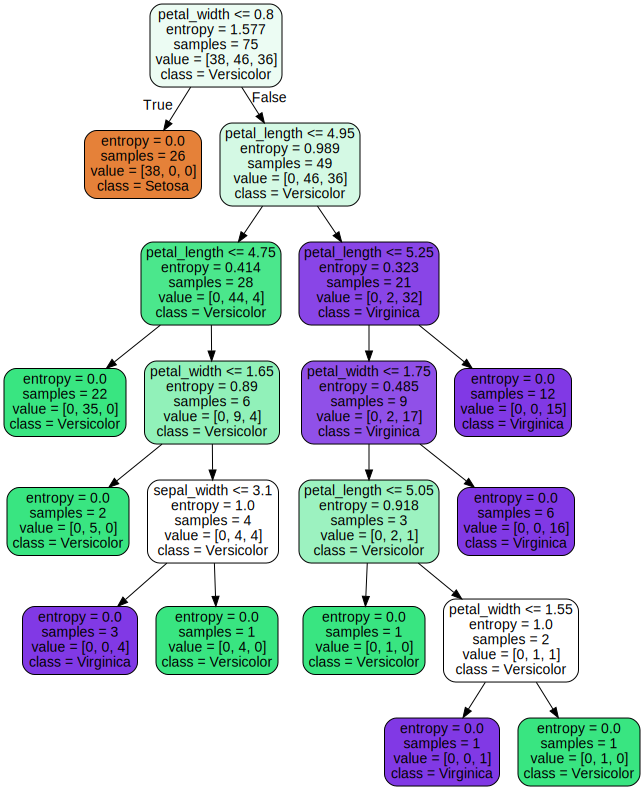

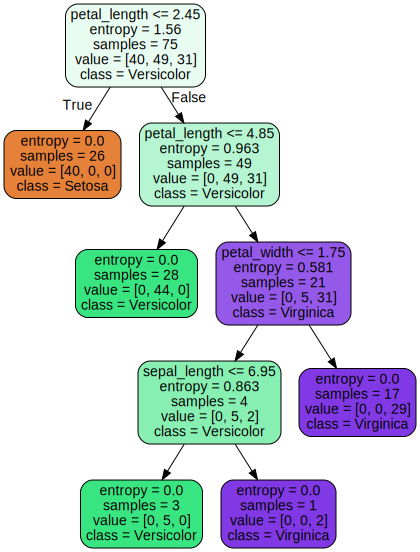

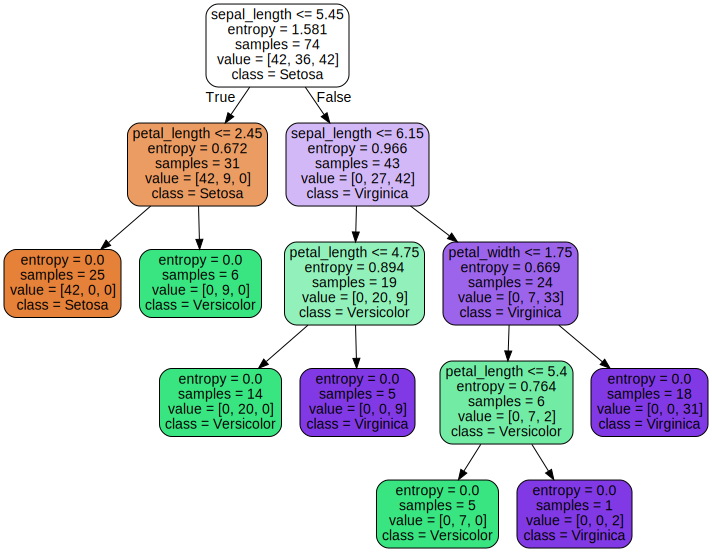

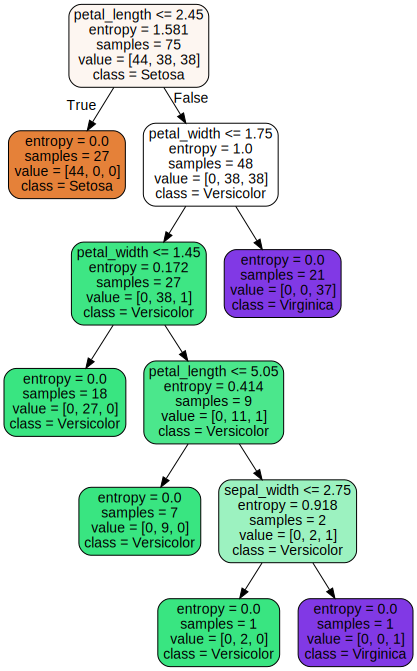

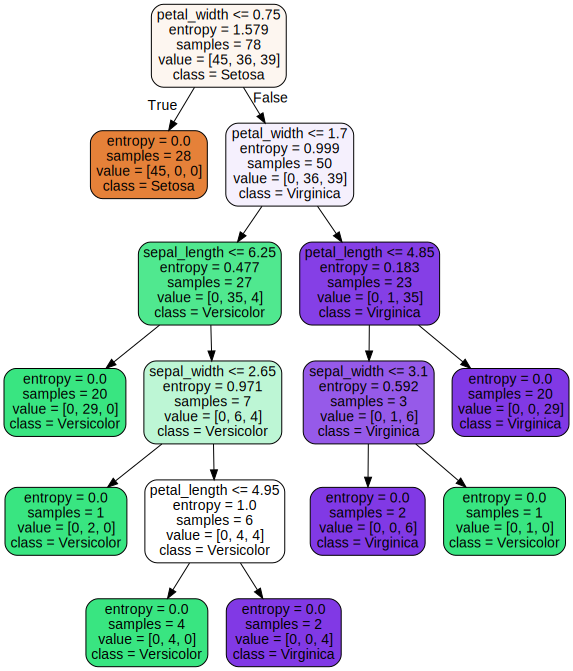

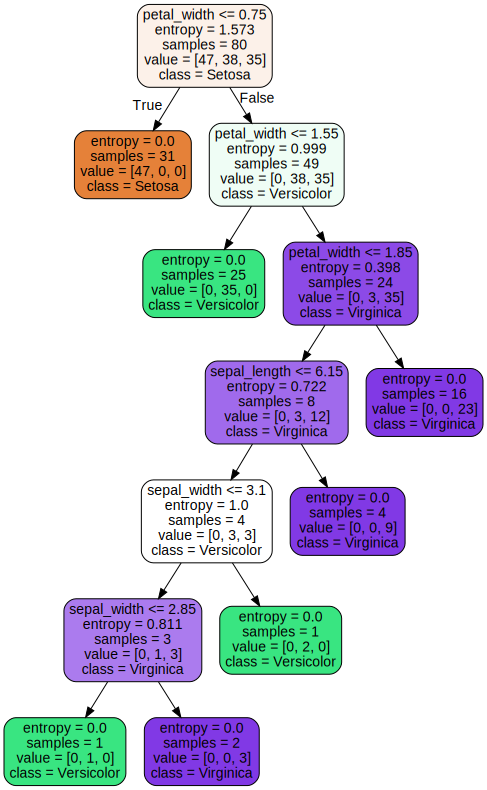

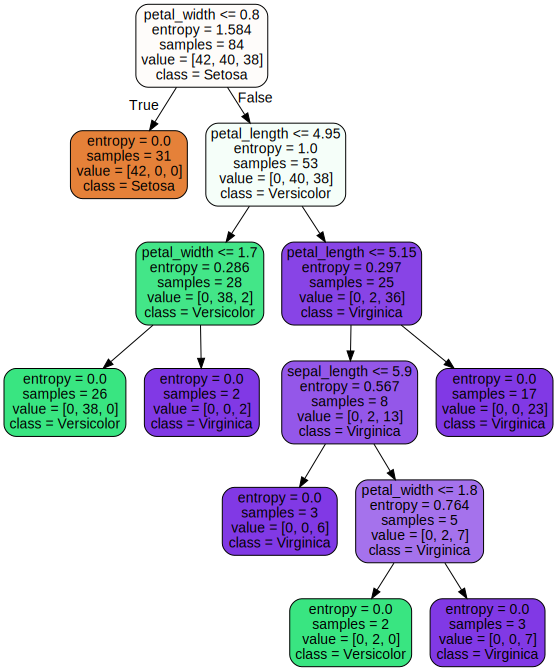

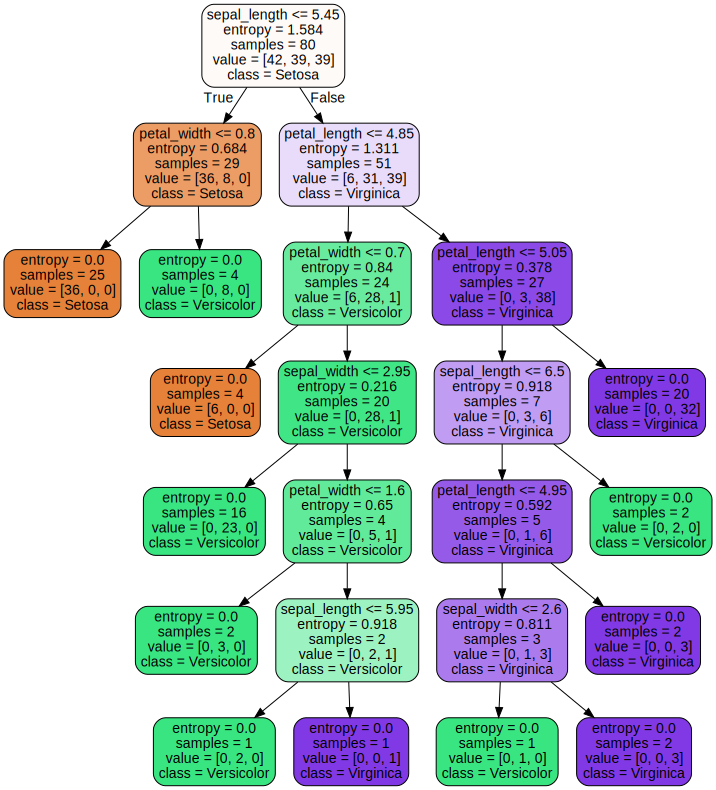

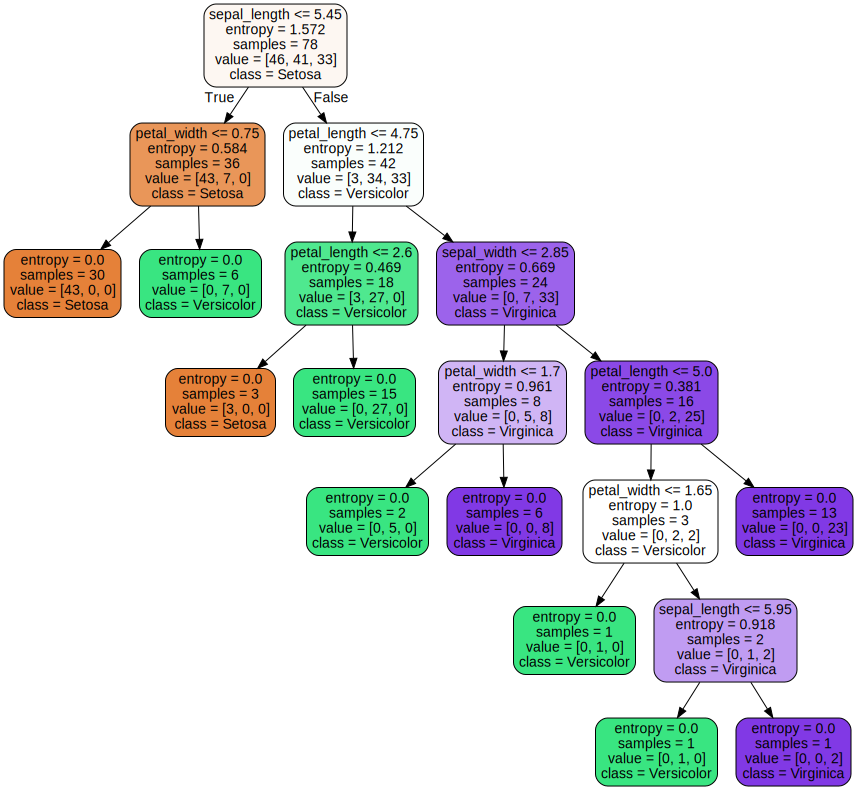

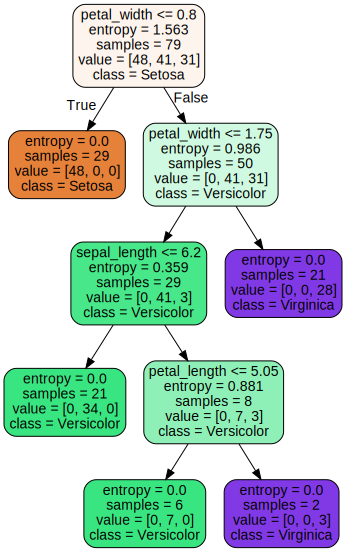

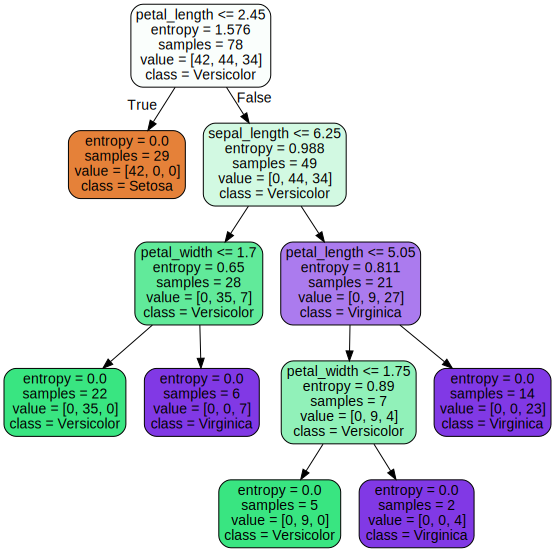

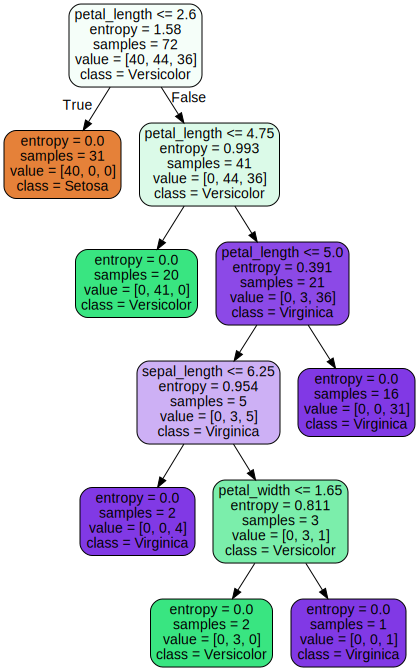

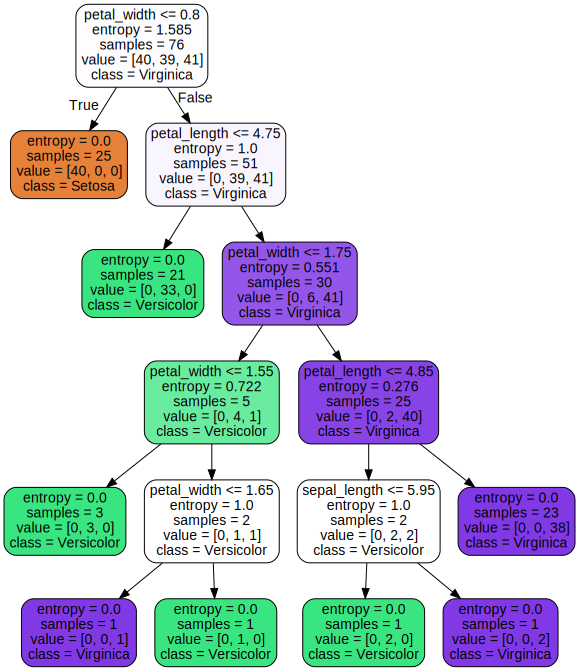

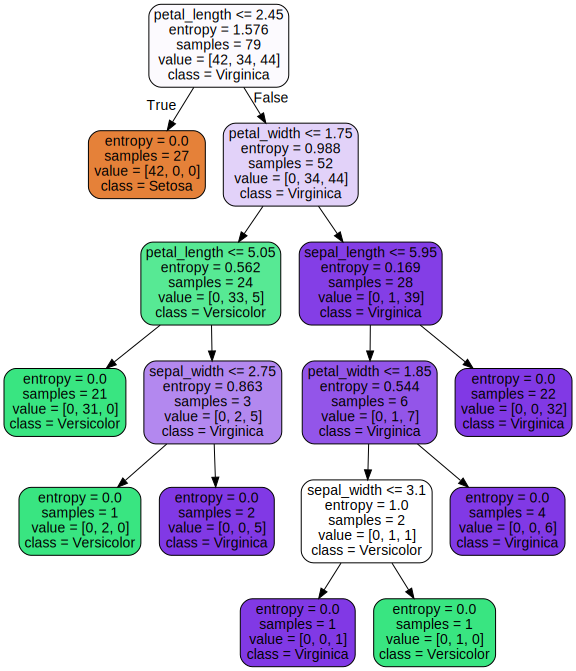

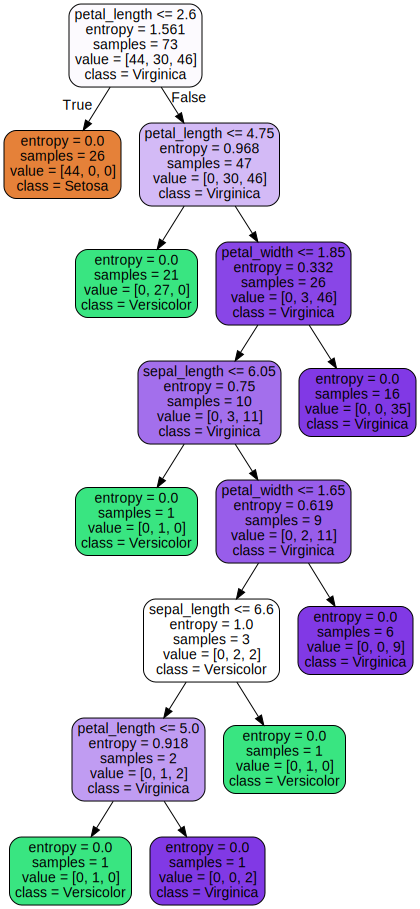

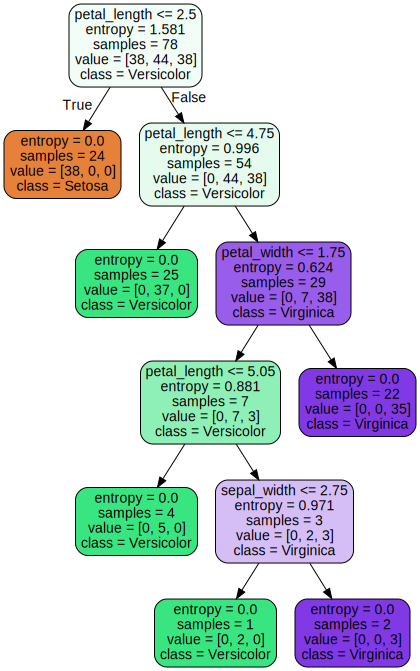

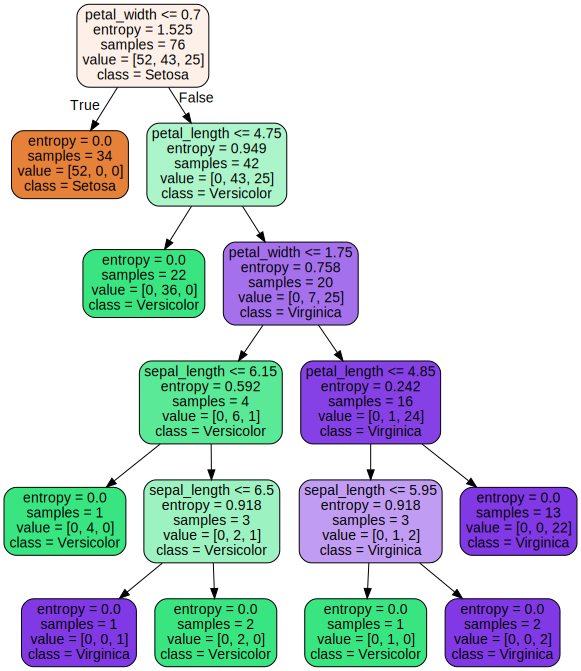

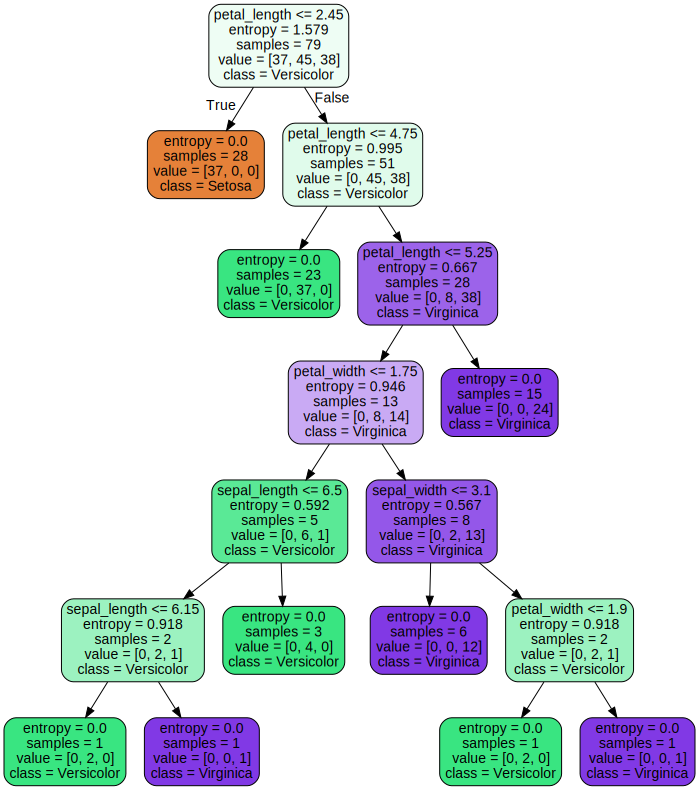

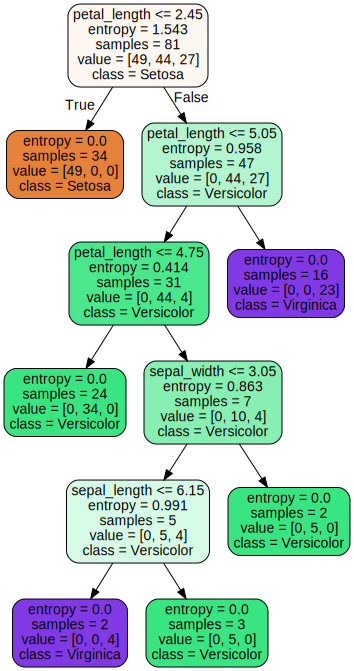

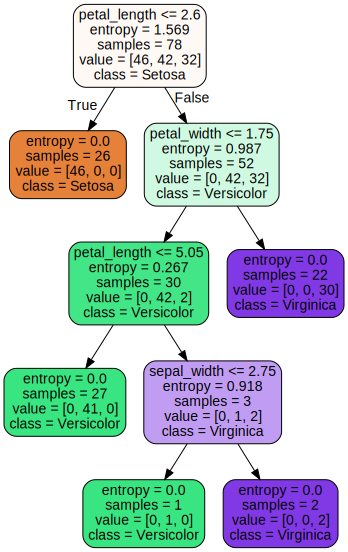

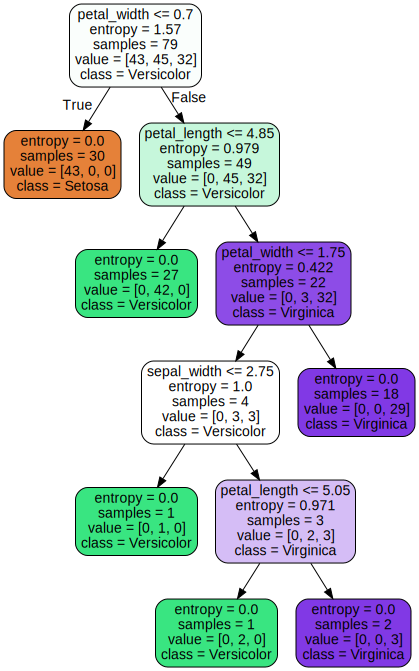

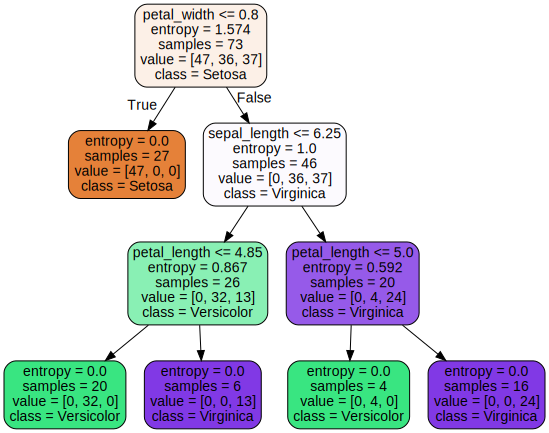

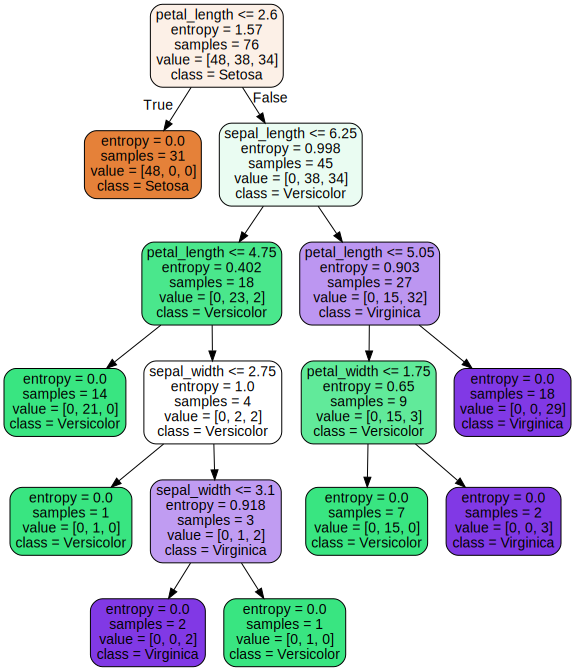

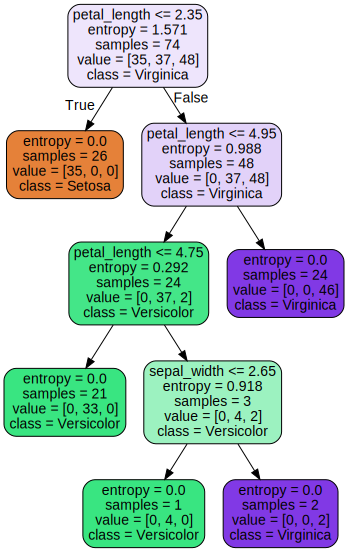

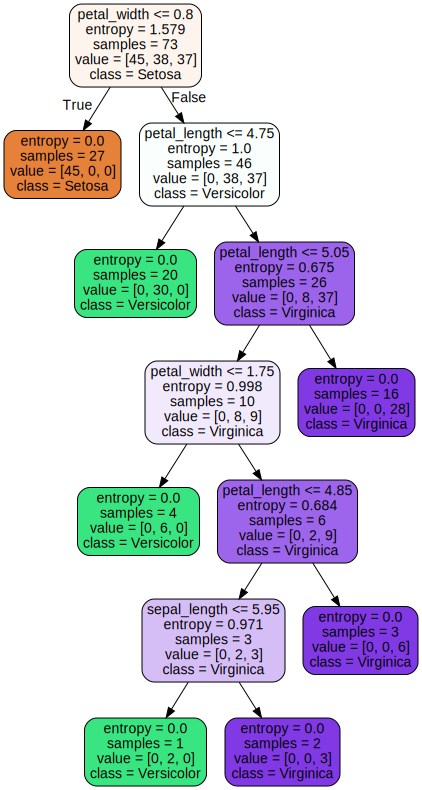

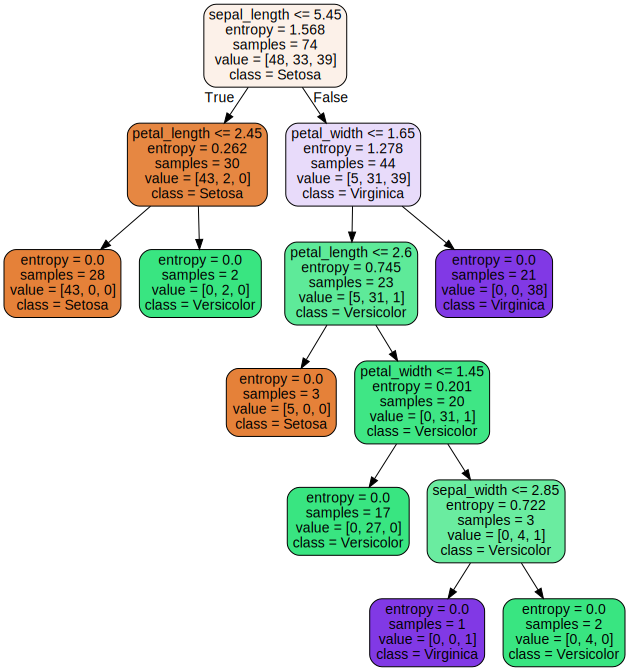

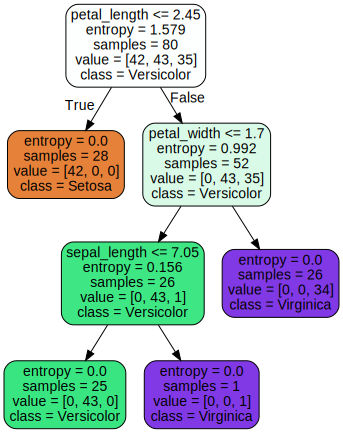

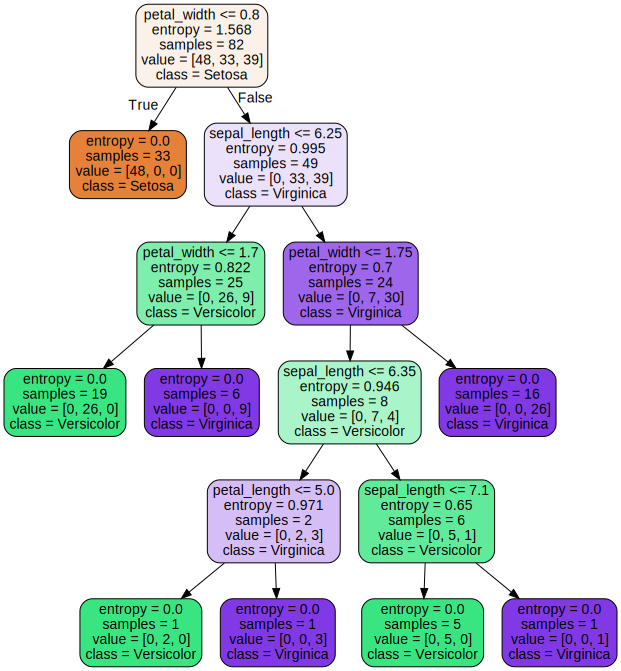

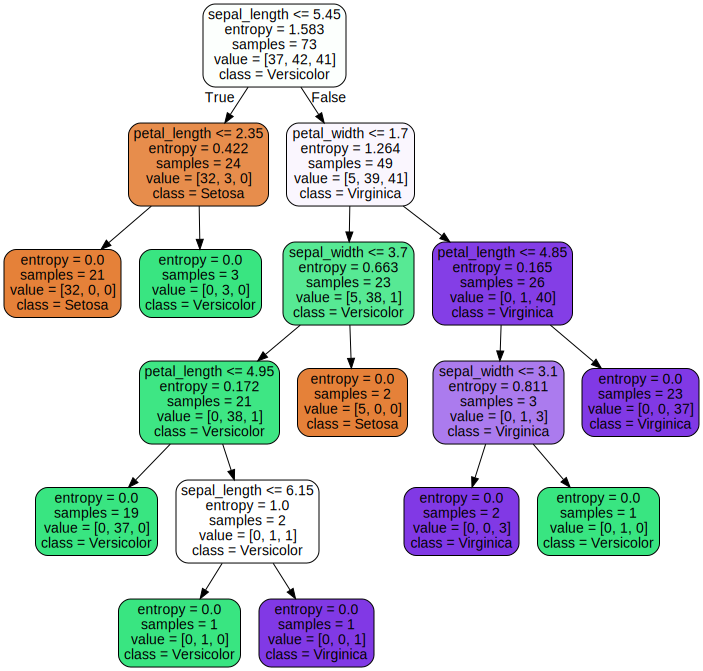

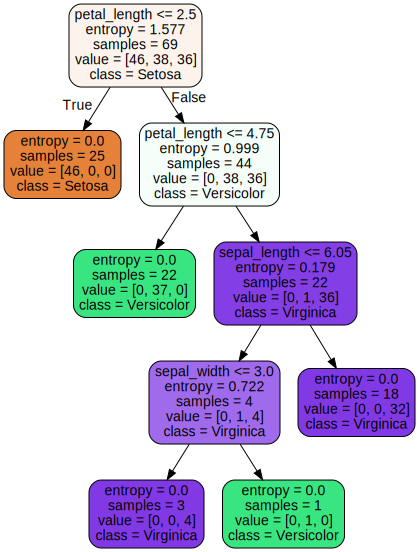

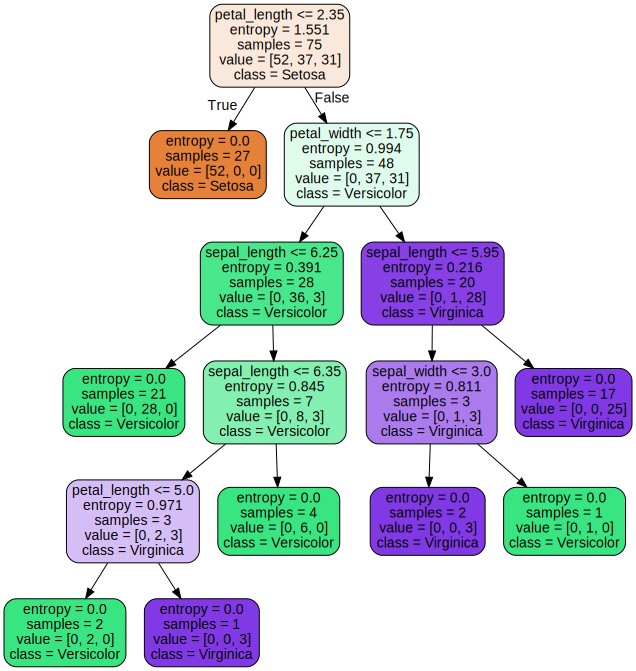

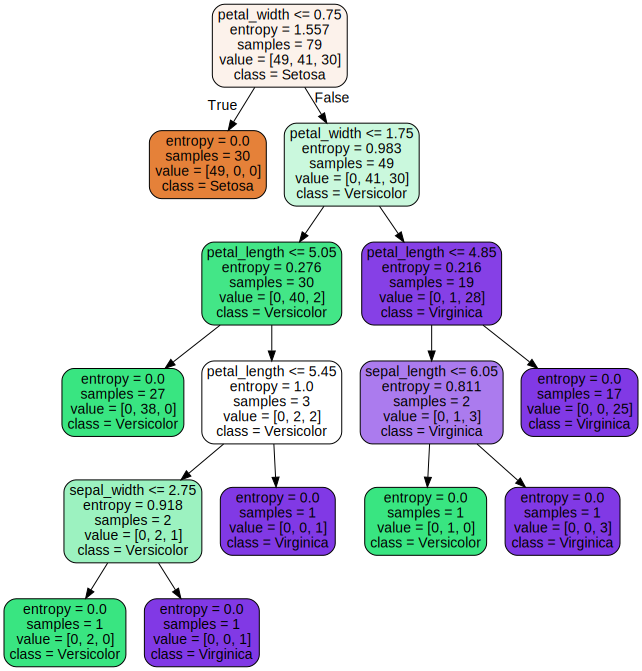

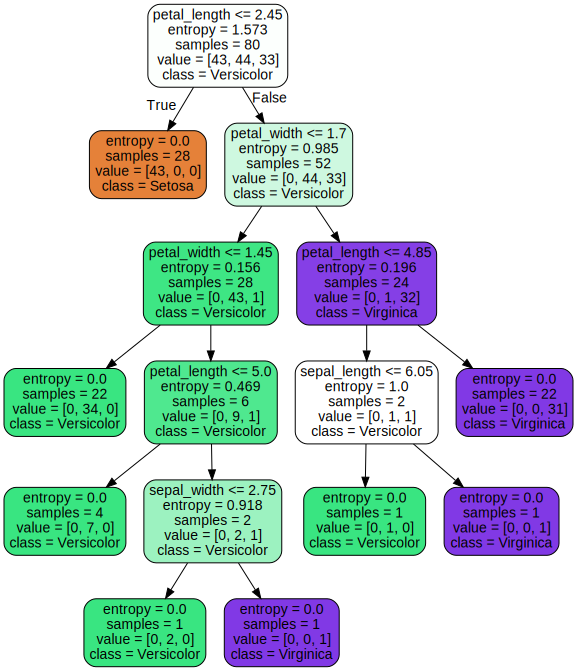

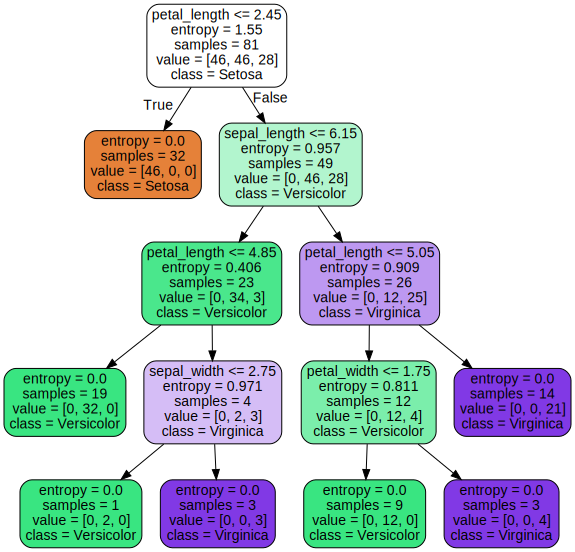

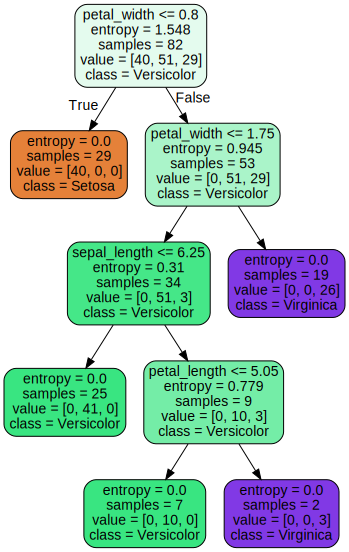

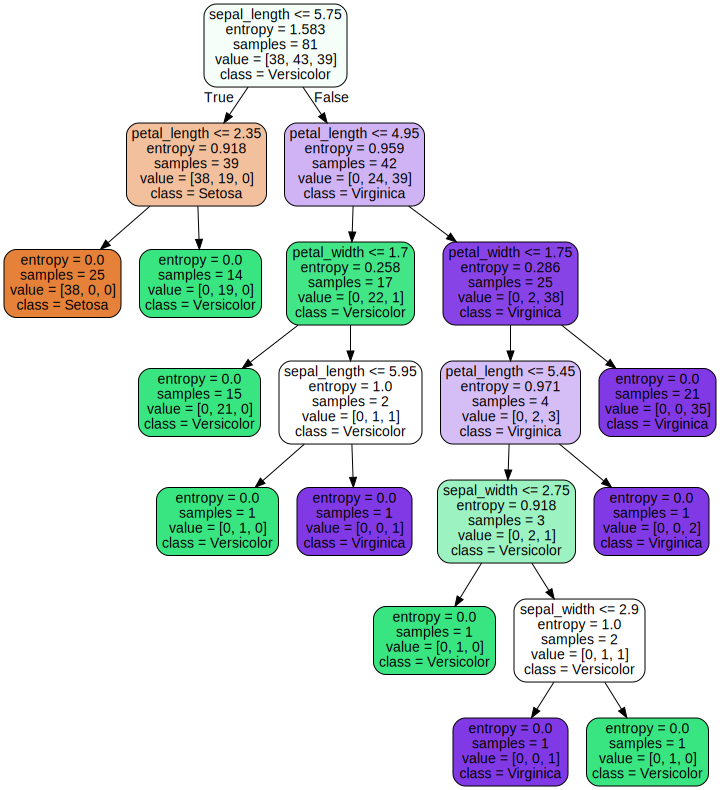

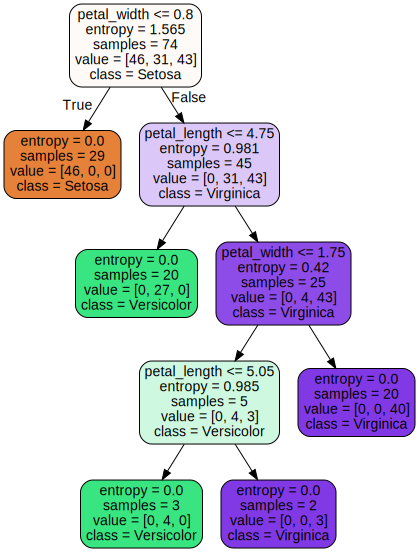

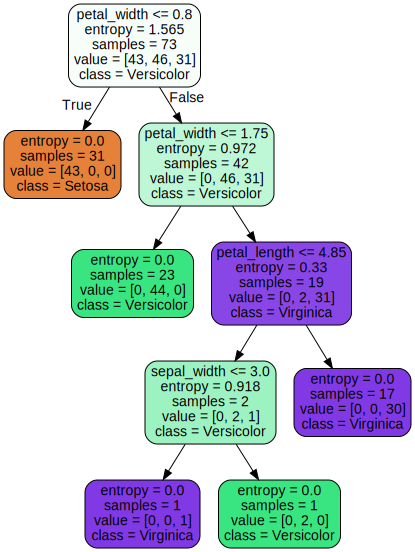

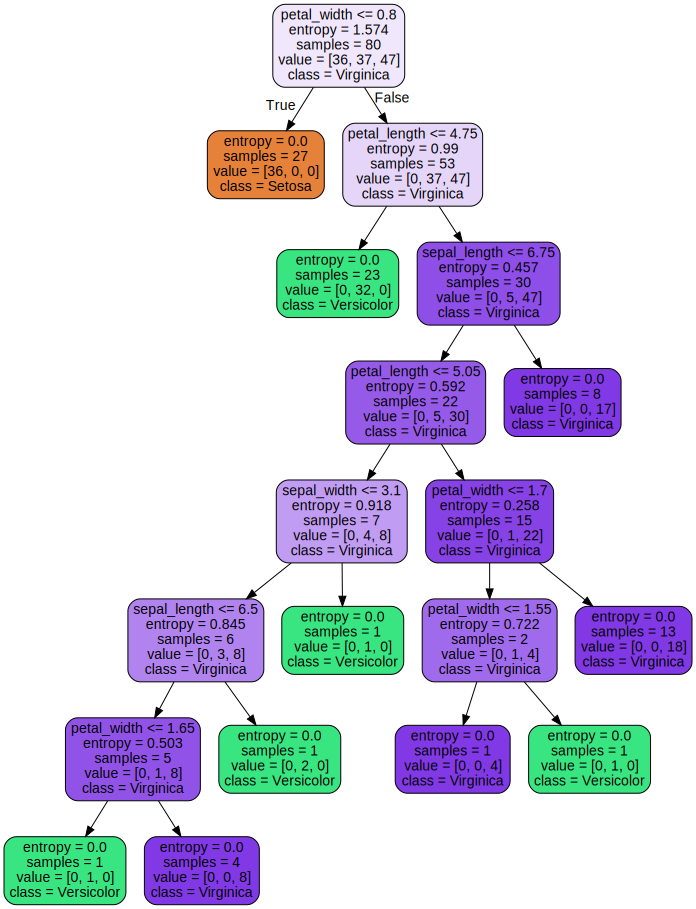

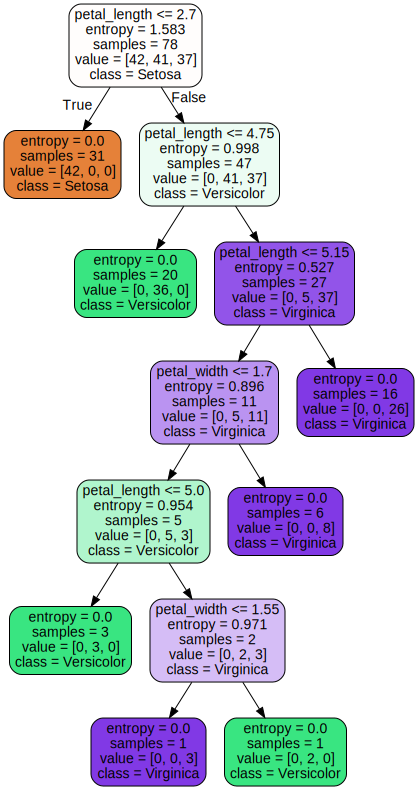

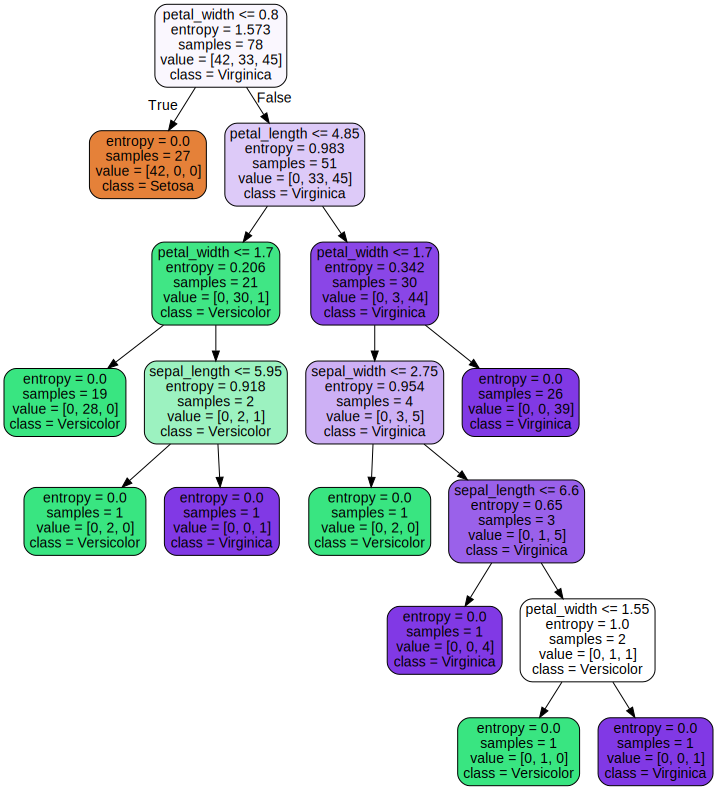

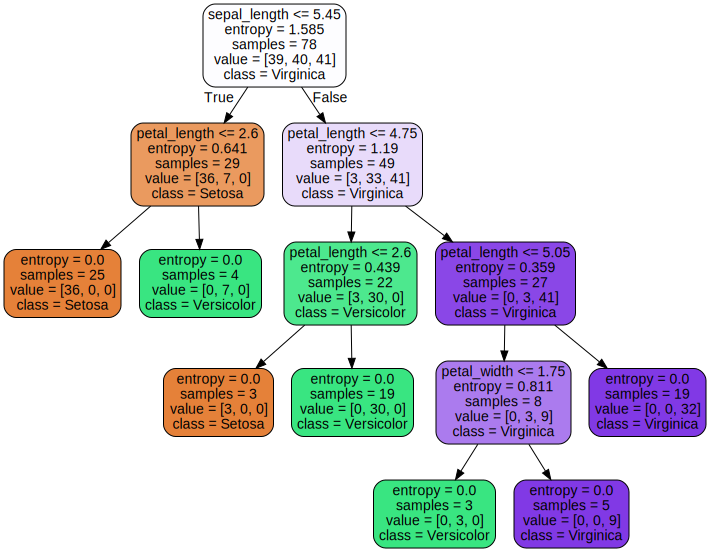

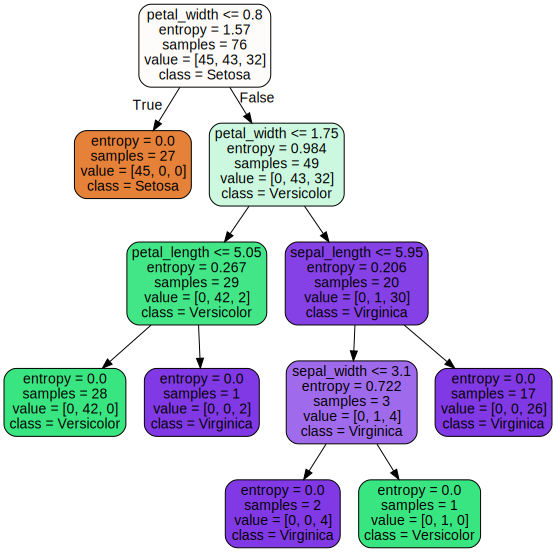

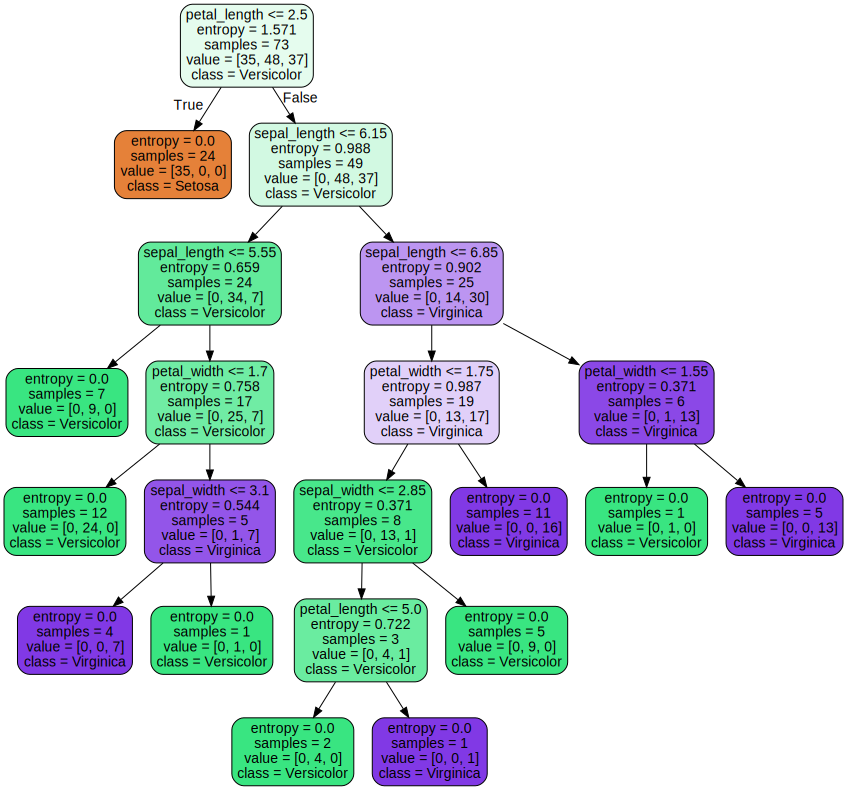

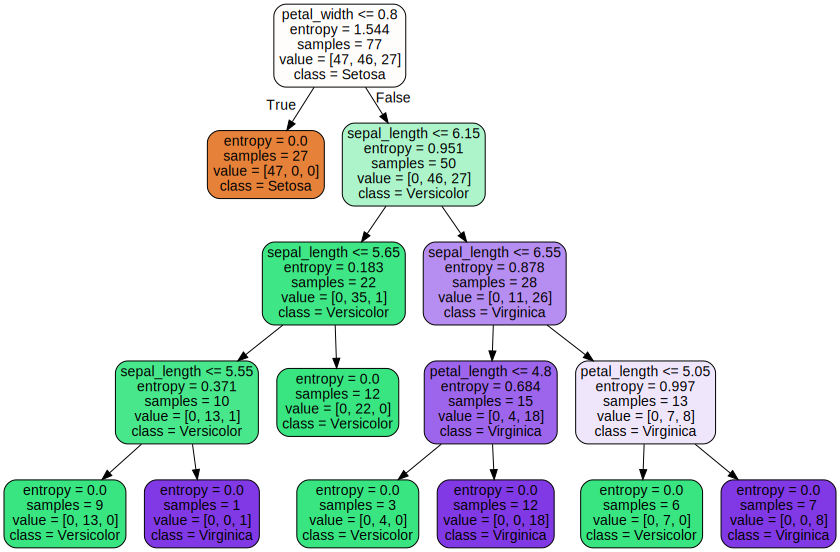

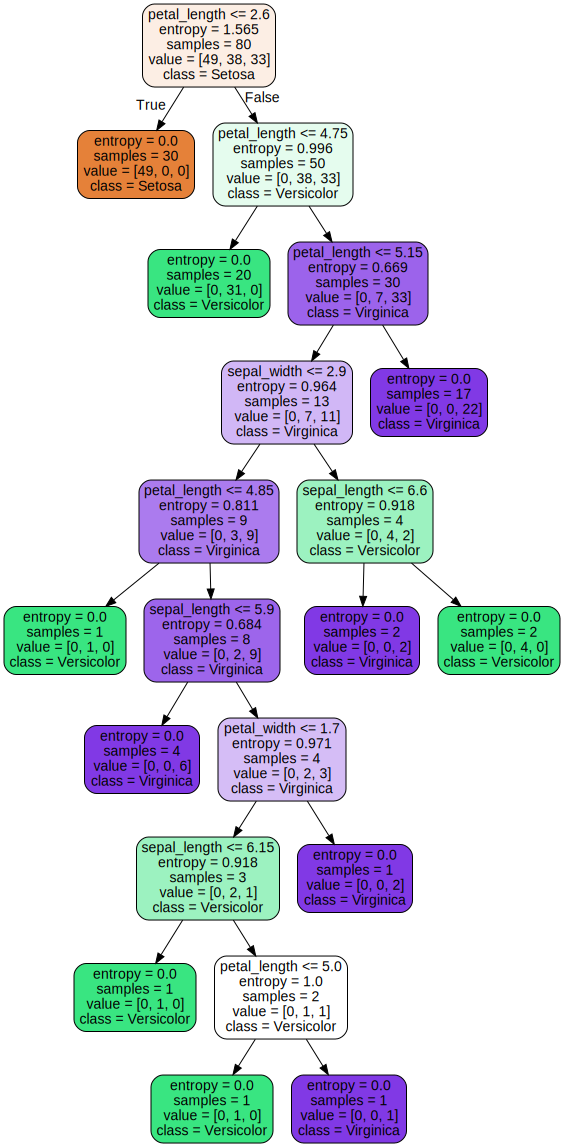

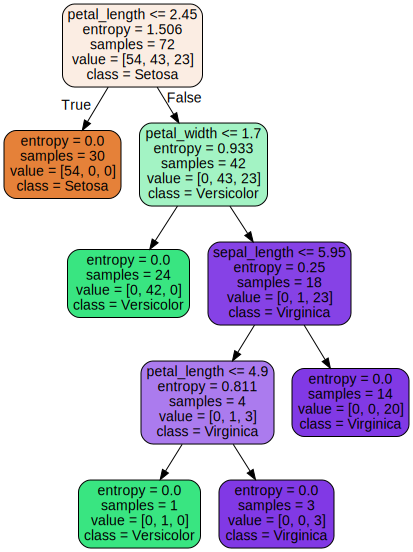

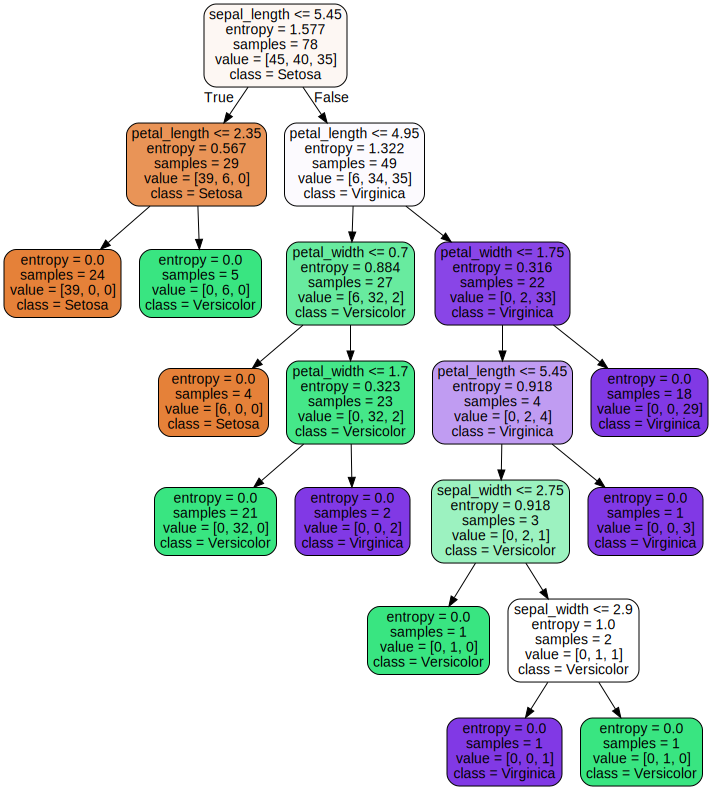

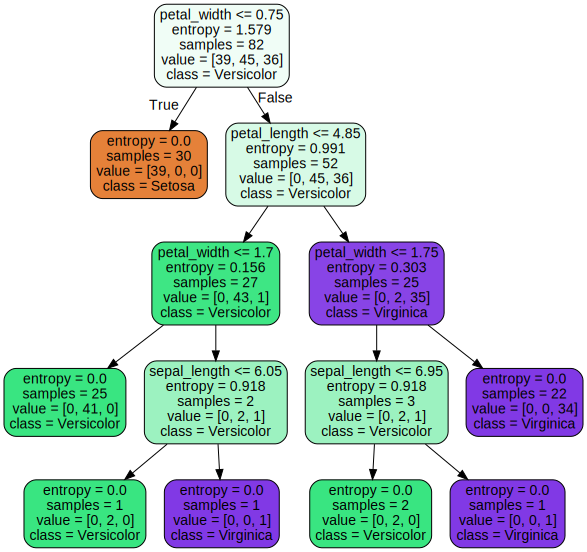

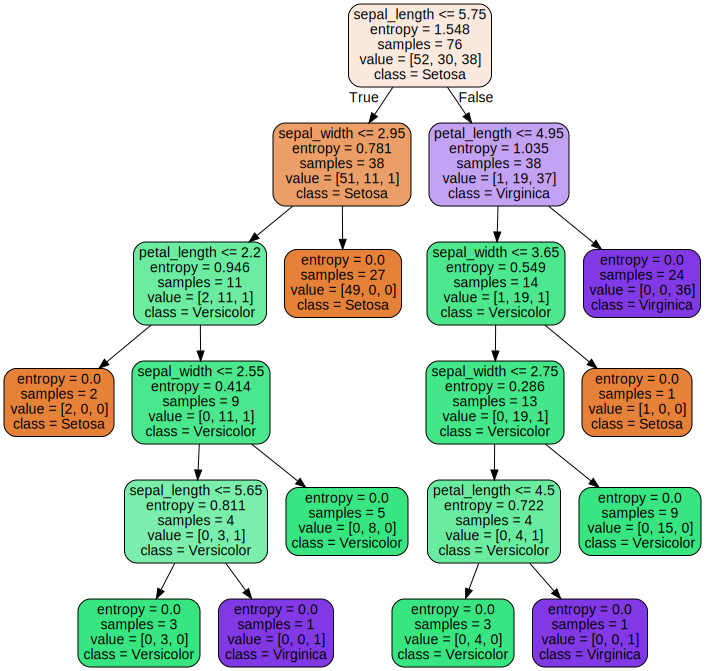

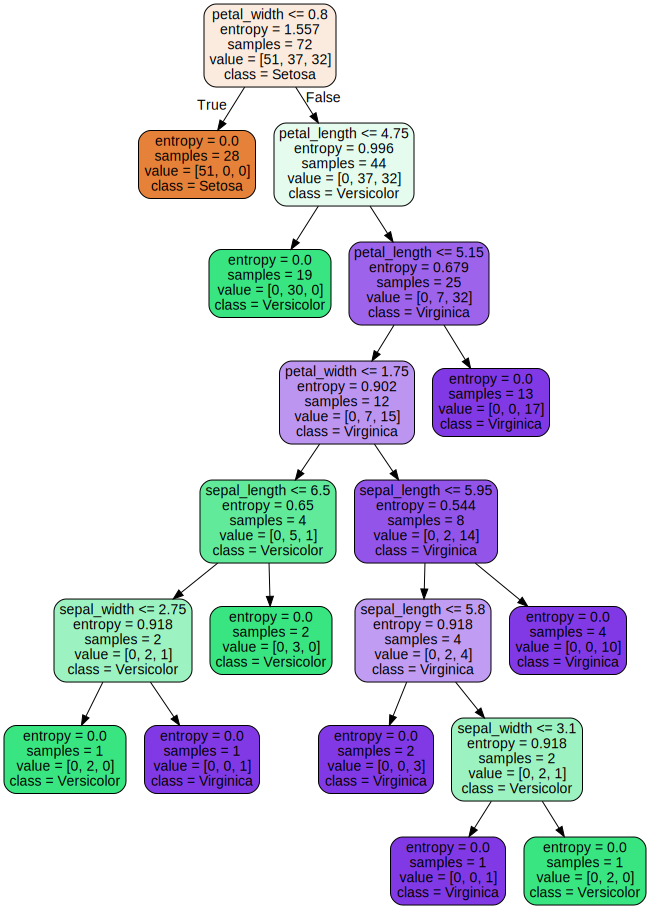

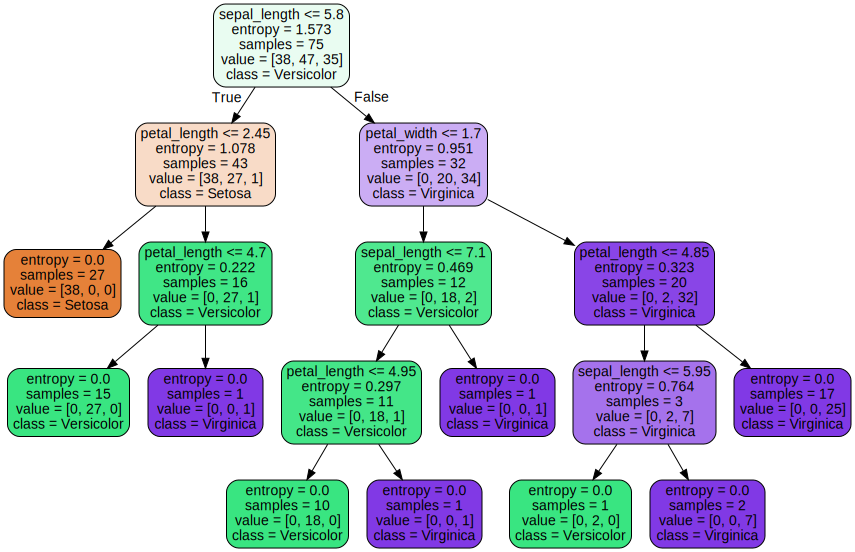

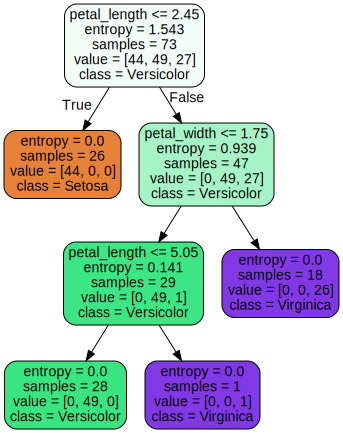

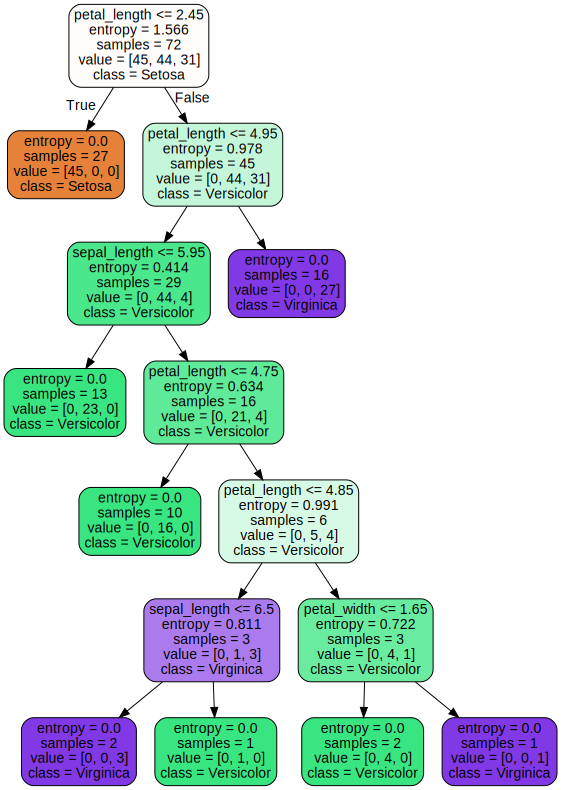

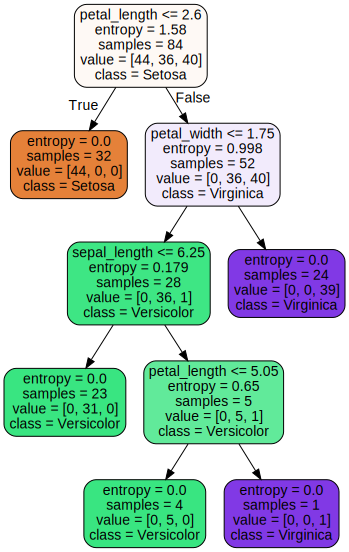

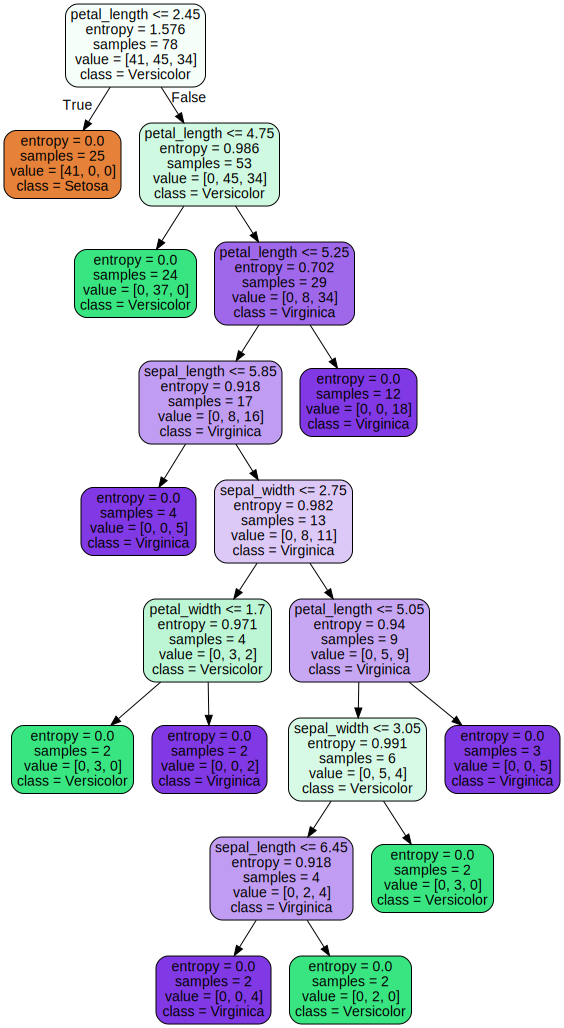

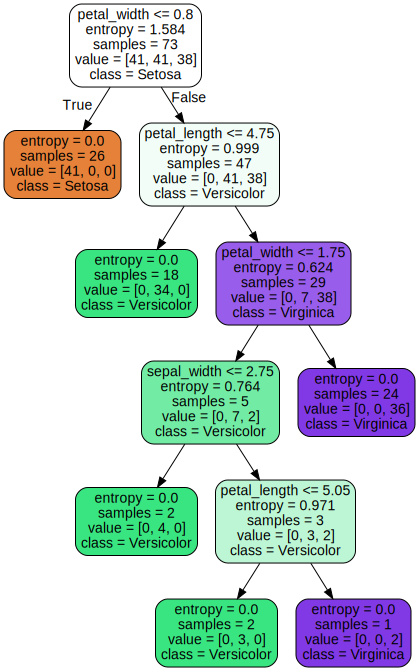

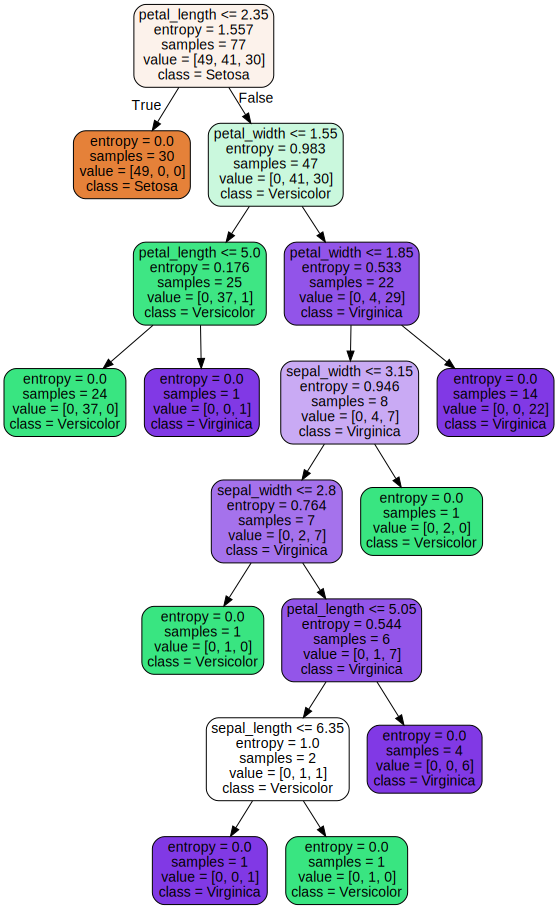

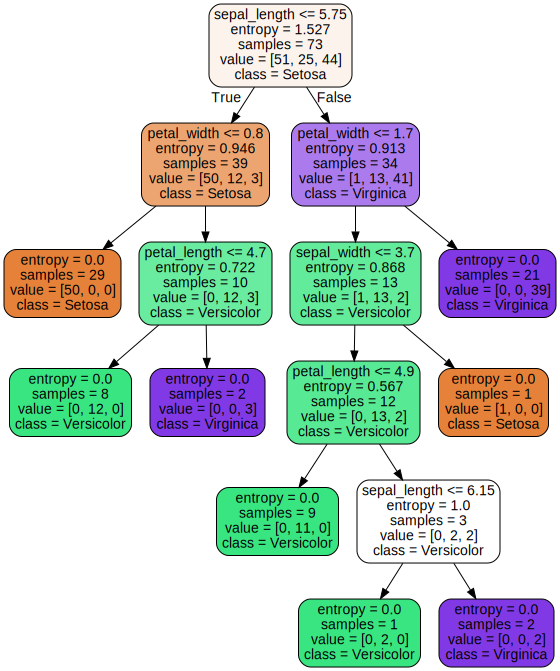

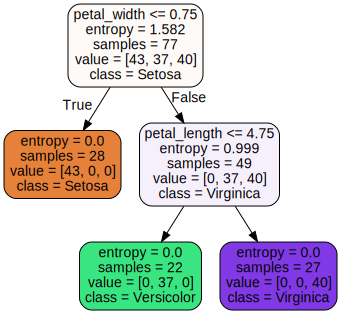

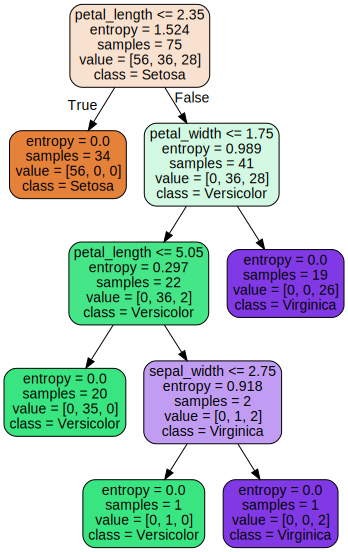

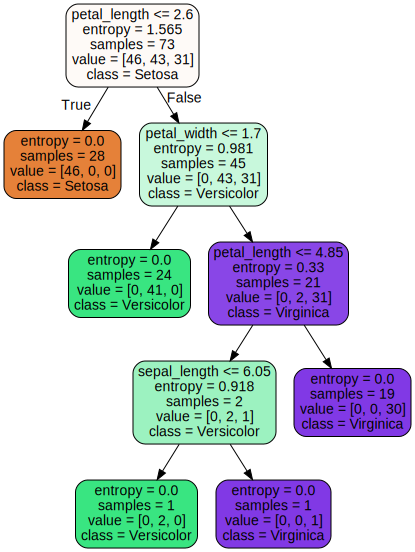

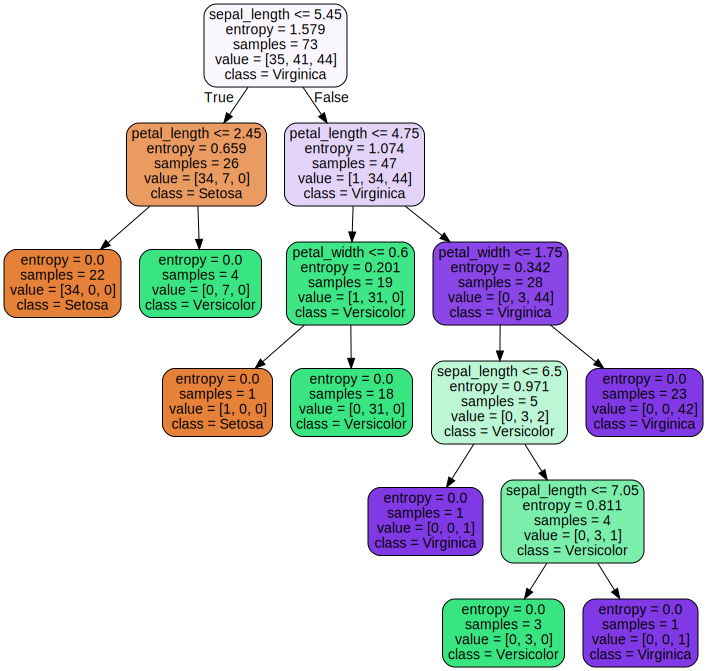

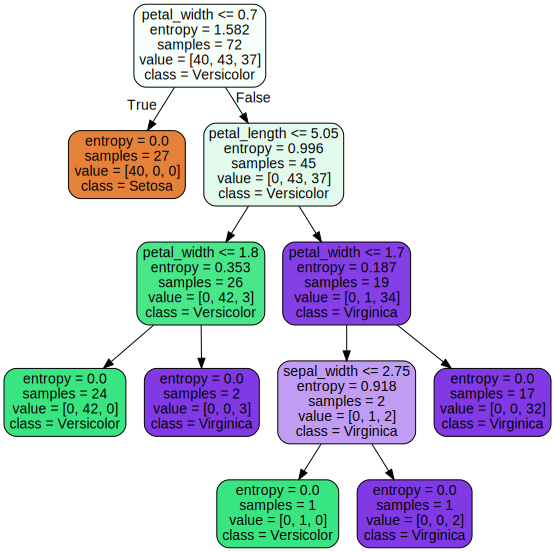

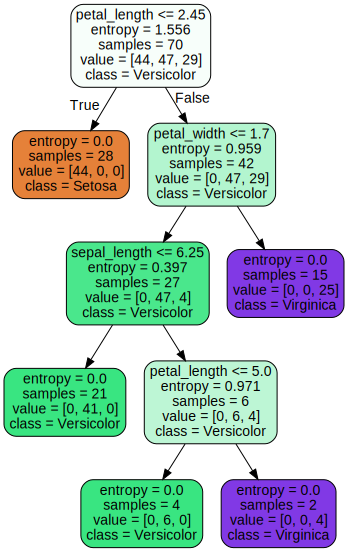

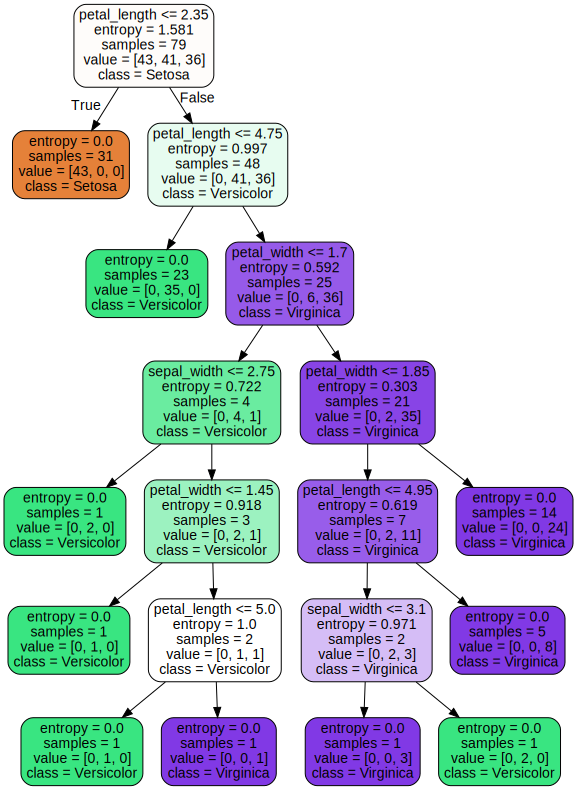

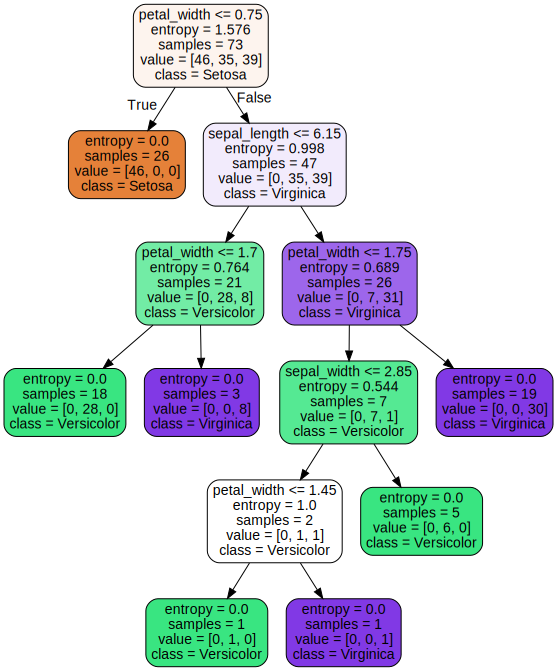

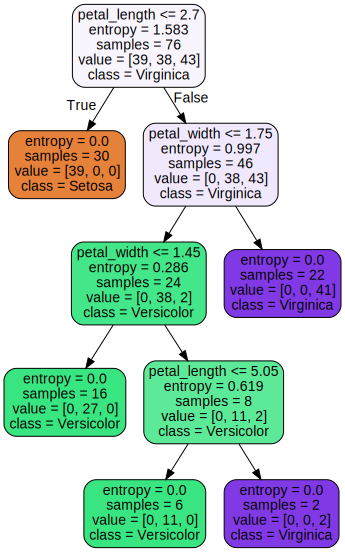

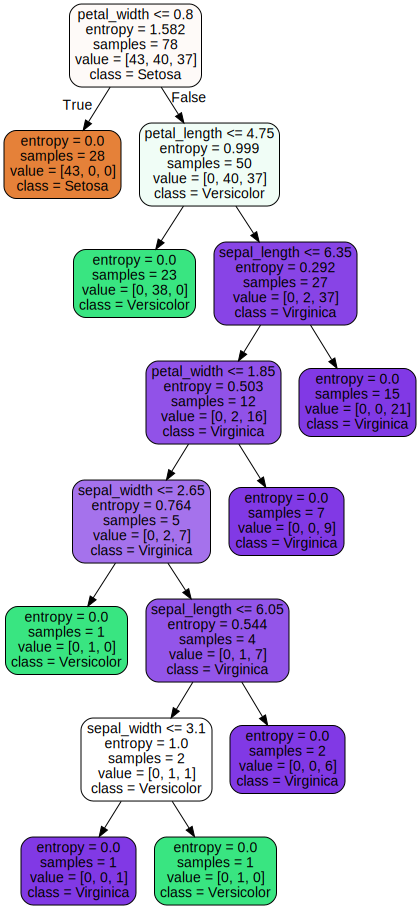

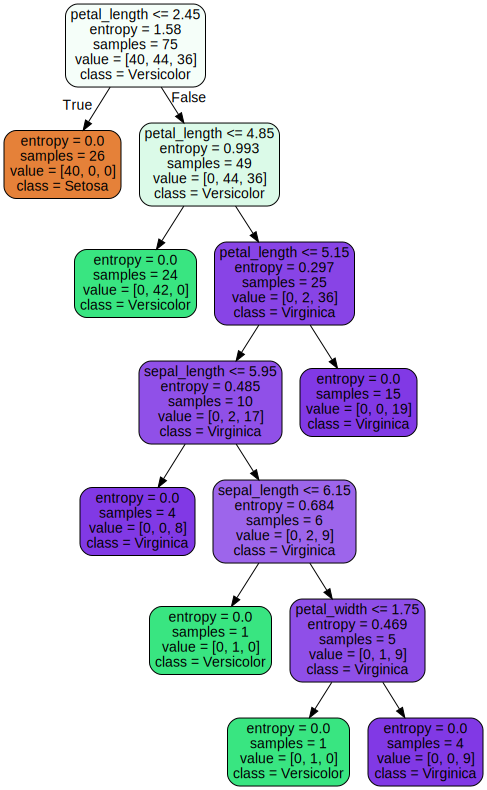

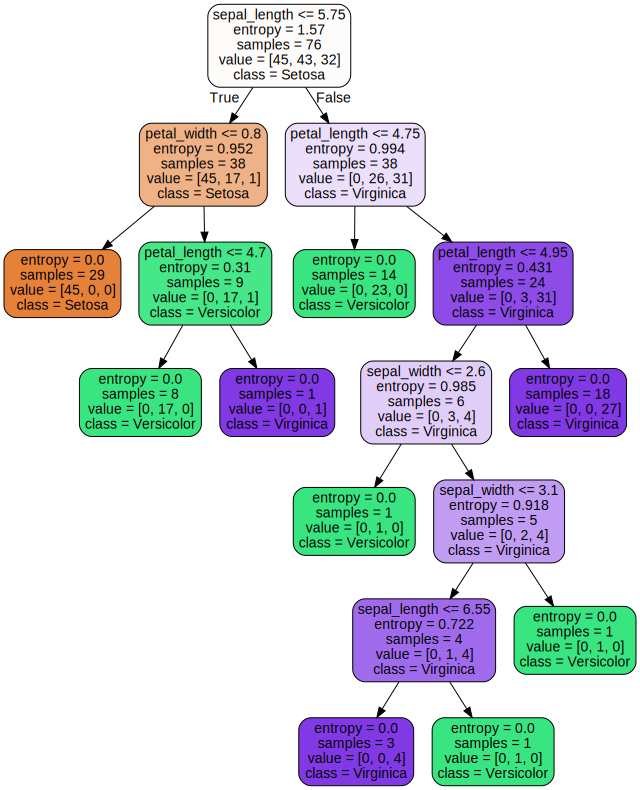

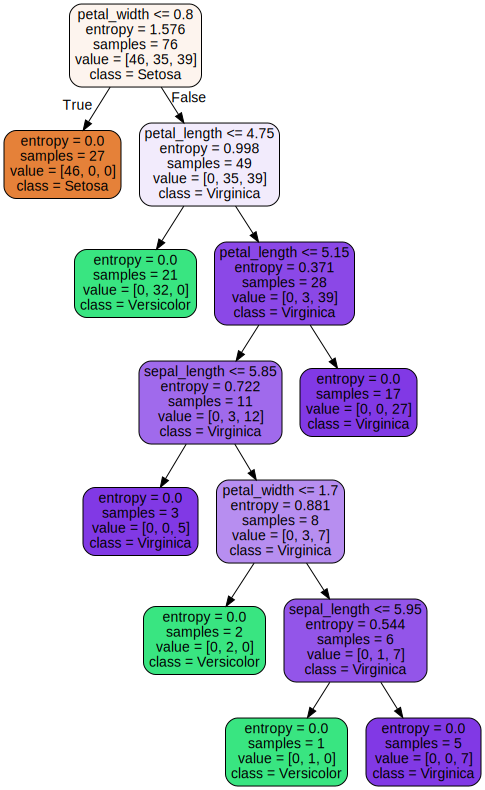

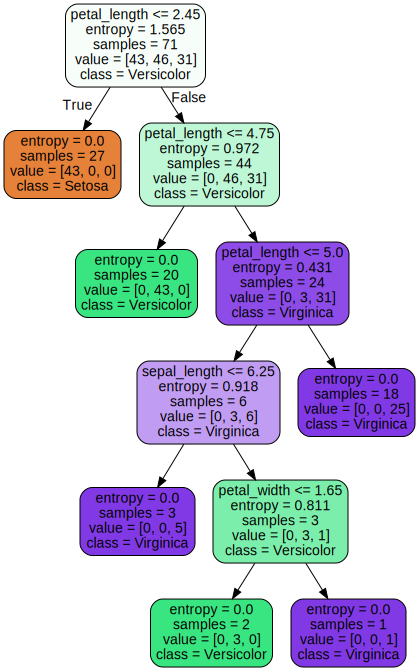

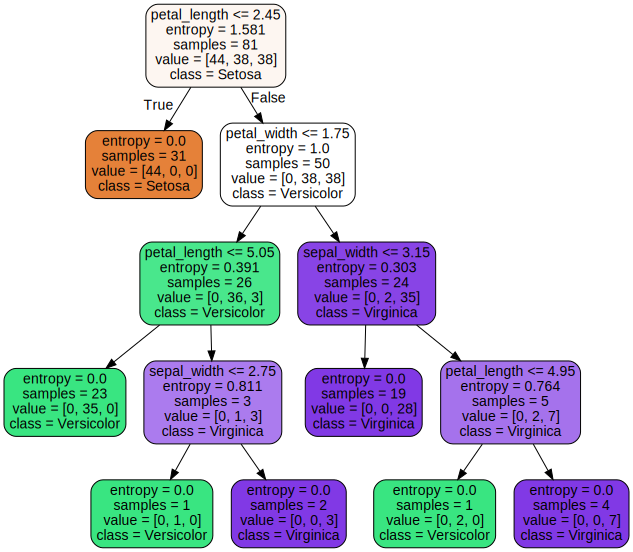

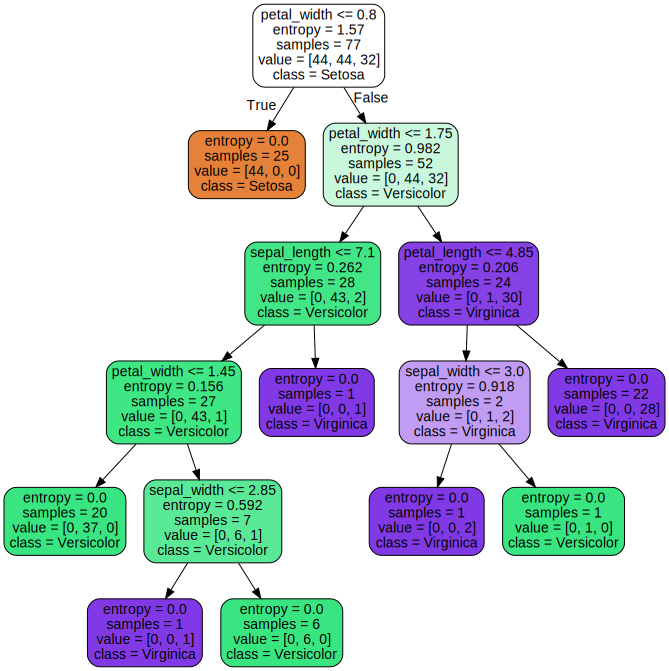

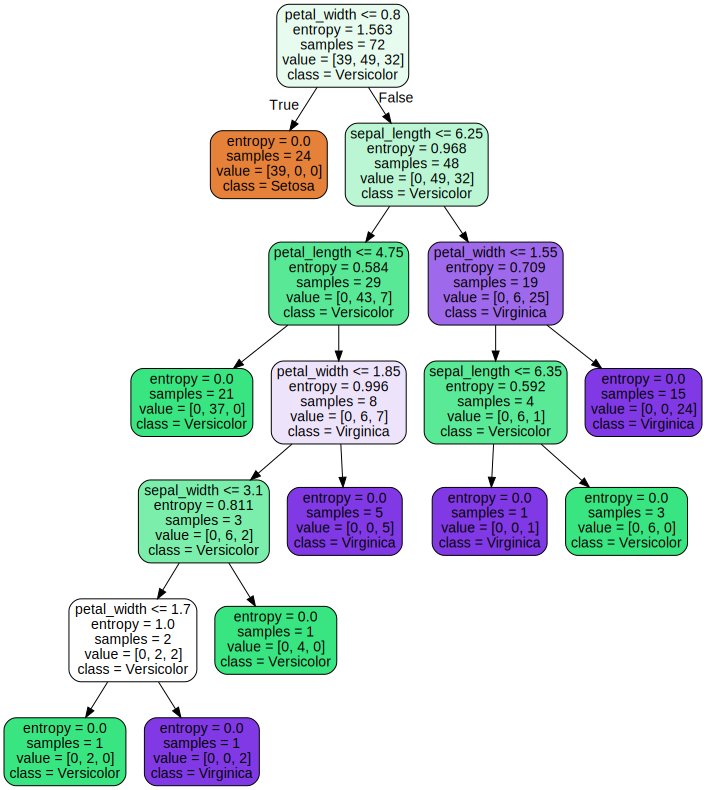

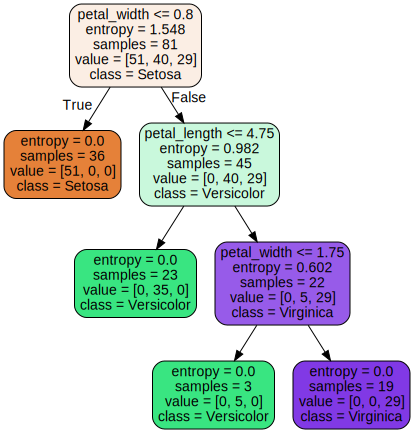

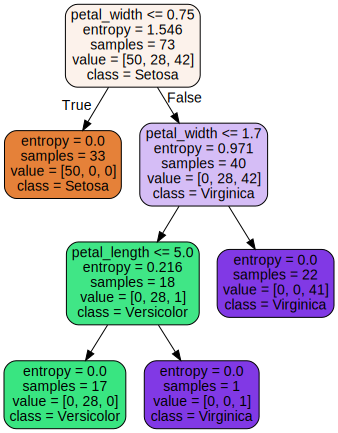

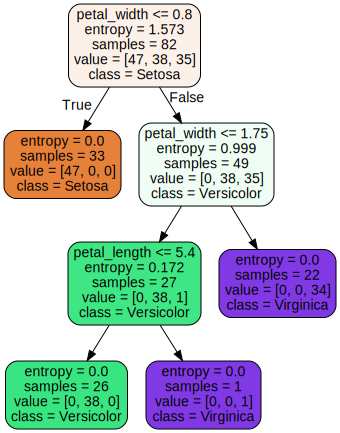

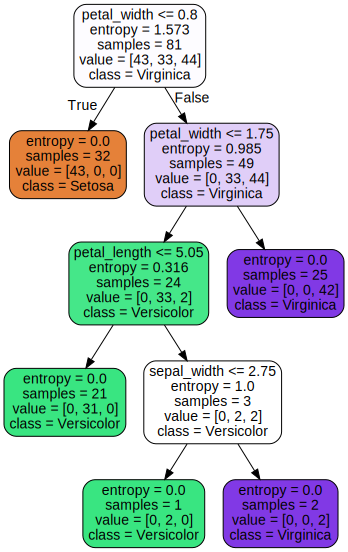

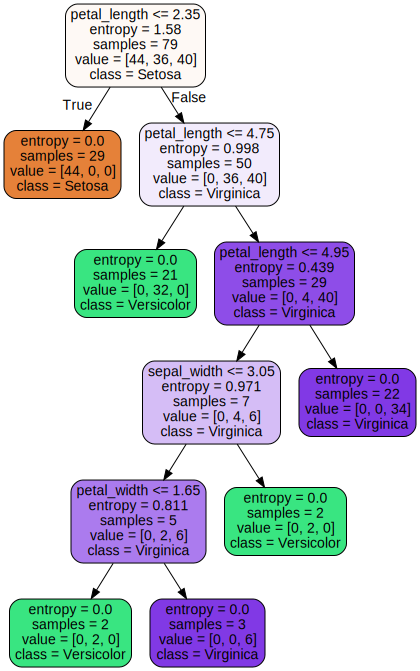

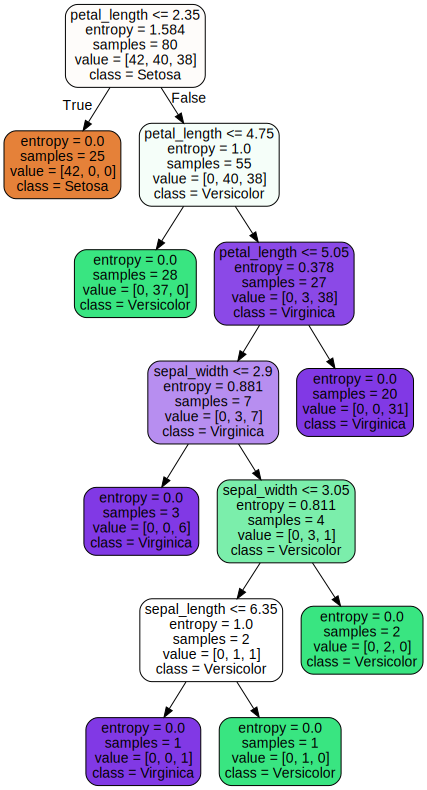

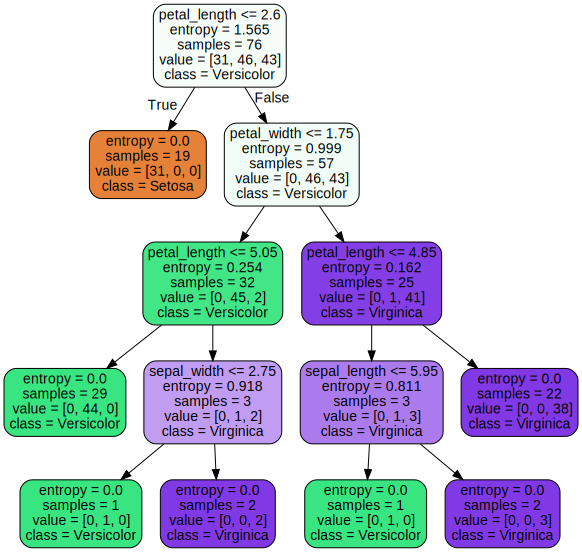

In [6]:
import graphviz
from sklearn.tree import export_graphviz

# Extract individual decision trees from the Random Forest
estimators = rfc.estimators_

# Visualize each tree using Graphviz
for i in range(len(estimators)):
    dot_data = export_graphviz(estimators[i], out_file=None, feature_names=list(X.columns),
                               class_names=["Setosa", "Versicolor", "Virginica"], filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    display(graph)  # This will print the trees in your console




---



#THE END

---

